# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Найдем-и-изучим-пропущенные-значения-в-столбцах" data-toc-modified-id="Найдем-и-изучим-пропущенные-значения-в-столбцах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Найдем и изучим пропущенные значения в столбцах</a></span><ul class="toc-item"><li><span><a href="#Заполним-пропущенные-значения-там,-где-это-возможно-и-уместно,-а-именно:" data-toc-modified-id="Заполним-пропущенные-значения-там,-где-это-возможно-и-уместно,-а-именно:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Заполним пропущенные значения там, где это возможно и уместно, а именно:</a></span></li><li><span><a href="#Причины,-которые-могли-привести-к-пропускам-в-данных:" data-toc-modified-id="Причины,-которые-могли-привести-к-пропускам-в-данных:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Причины, которые могли привести к пропускам в данных:</a></span></li></ul></li><li><span><a href="#Рассмотрим-типы-данных-в-каждом-столбце" data-toc-modified-id="Рассмотрим-типы-данных-в-каждом-столбце-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Рассмотрим типы данных в каждом столбце</a></span><ul class="toc-item"><li><span><a href="#Результат" data-toc-modified-id="Результат-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Результат</a></span></li></ul></li><li><span><a href="#Изучим-уникальные-значения-в-столбце-с-названиями-населенных-пунктов.-Удалим-явные-и-неявные-дубликаты." data-toc-modified-id="Изучим-уникальные-значения-в-столбце-с-названиями-населенных-пунктов.-Удалим-явные-и-неявные-дубликаты.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучим уникальные значения в столбце с названиями населенных пунктов. Удалим явные и неявные дубликаты.</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Найдем-и-устраним-редкие-и-выбивающиеся-значения." data-toc-modified-id="Найдем-и-устраним-редкие-и-выбивающиеся-значения.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Найдем и устраним редкие и выбивающиеся значения.</a></span><ul class="toc-item"><li><span><a href="#Сначала-рассмотрим-числовые-описания-по-выбранным-показателям:" data-toc-modified-id="Сначала-рассмотрим-числовые-описания-по-выбранным-показателям:-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Сначала рассмотрим числовые описания по выбранным показателям:</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4.1.1"><span class="toc-item-num">2.4.1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Рассмотрим-и-устраним-аномальные-значения-в-столбцах-'total_area',-'ceiling_height',-'days_exposition',--'last_price',-'living_area',--'kitchen_area'" data-toc-modified-id="Рассмотрим-и-устраним-аномальные-значения-в-столбцах-'total_area',-'ceiling_height',-'days_exposition',--'last_price',-'living_area',--'kitchen_area'-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Рассмотрим и устраним аномальные значения в столбцах 'total_area', 'ceiling_height', 'days_exposition',  'last_price', 'living_area',  'kitchen_area'</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Посчитайте-и-добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Посчитайте-и-добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Посчитайте и добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-параметры-и-построим-отдельные-гистограммы-для-каждого-из-них" data-toc-modified-id="Изучим-параметры-и-построим-отдельные-гистограммы-для-каждого-из-них-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучим параметры и построим отдельные гистограммы для каждого из них</a></span><ul class="toc-item"><li><span><a href="#Общие-наблюдения:" data-toc-modified-id="Общие-наблюдения:-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Общие наблюдения:</a></span></li></ul></li><li><span><a href="#Рассмотрим-как-быстро-продавались-квартиры:" data-toc-modified-id="Рассмотрим-как-быстро-продавались-квартиры:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Рассмотрим как быстро продавались квартиры:</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Рассмотрим-какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта:" data-toc-modified-id="Рассмотрим-какие-факторы-больше-всего-влияют-на-общую-(полную)-стоимость-объекта:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Рассмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта:</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений" data-toc-modified-id="Посчитаем-среднюю-цену-одного-квадратного-метра-в-10-населённых-пунктах-с-наибольшим-числом-объявлений-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Рассмотрим,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города:" data-toc-modified-id="Рассмотрим,-как-стоимость-объектов-зависит-от-расстояния-до-центра-города:-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Рассмотрим, как стоимость объектов зависит от расстояния до центра города:</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Бонус" data-toc-modified-id="Бонус-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Бонус</a></span></li></ul></div>

### Откроем файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

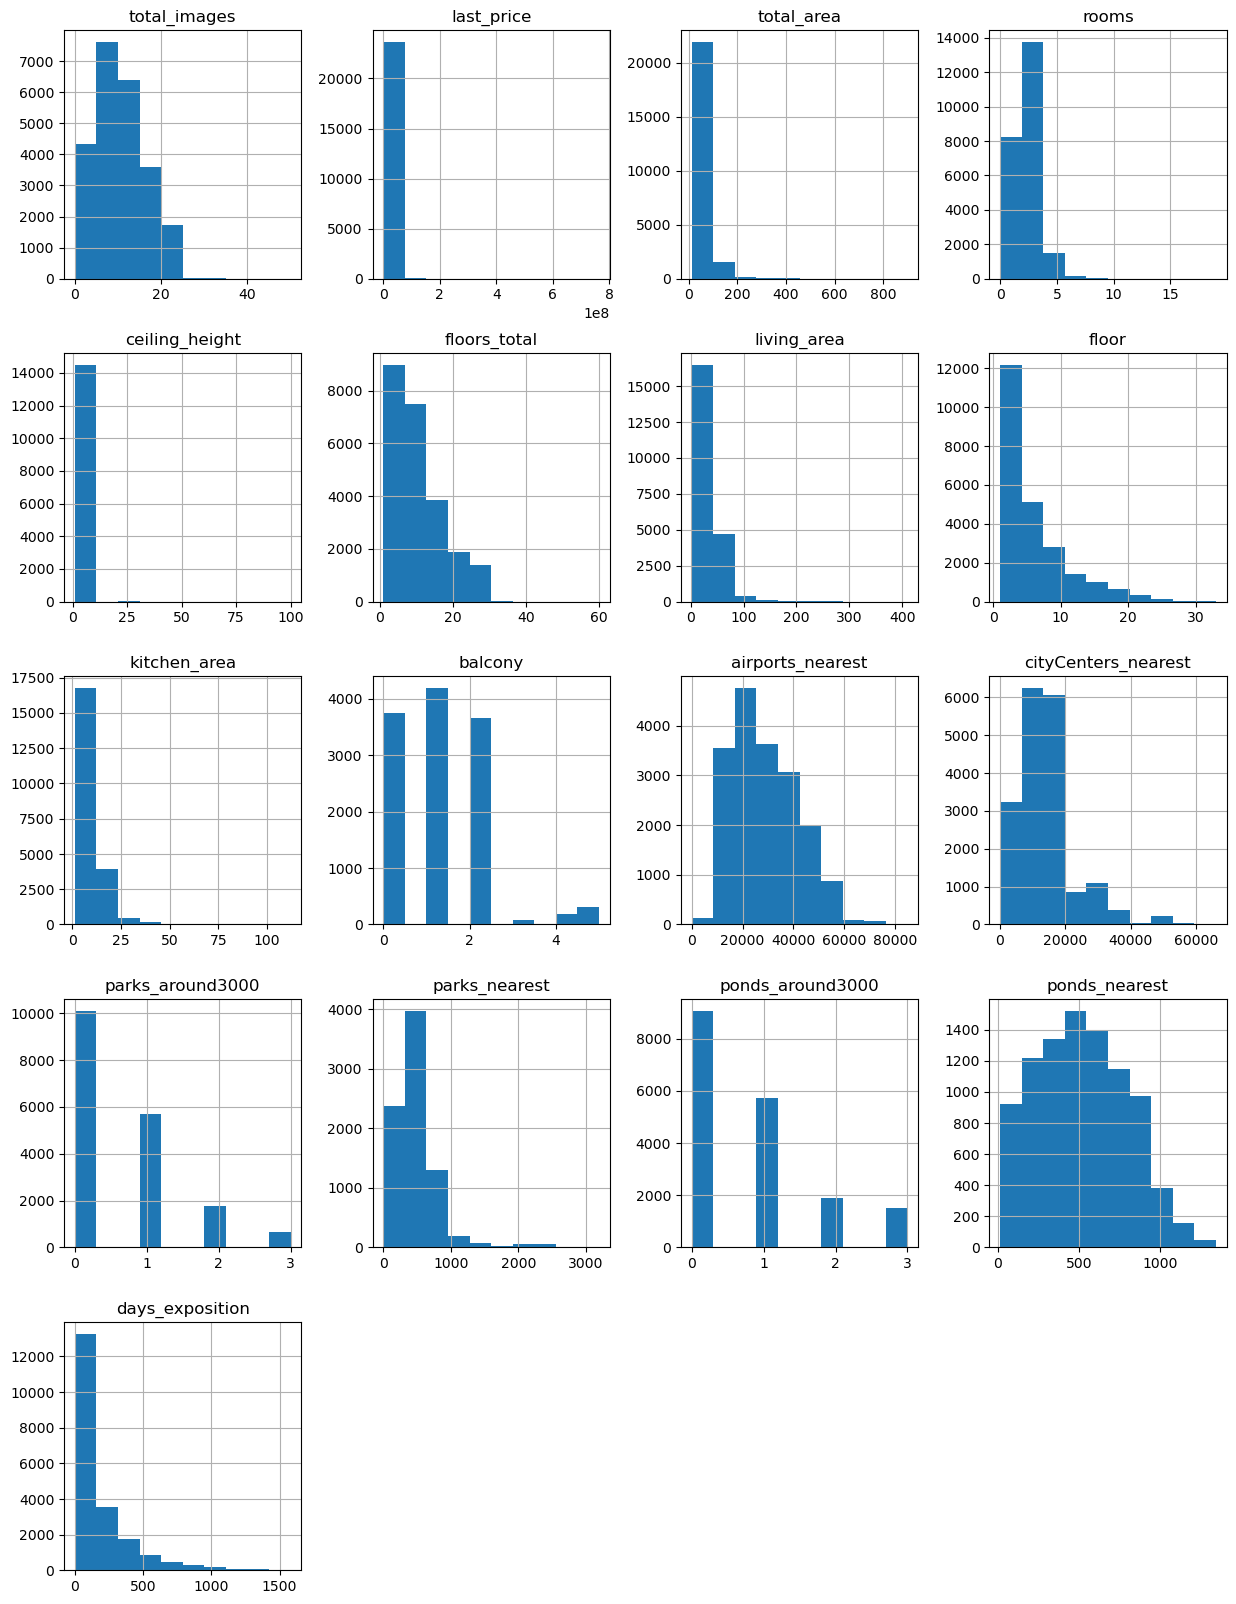

In [2]:
data = pd.read_csv('/Users/amest/Desktop/datasets/real_estate_data.csv', sep='\t')
display(data.head())
data.info()
data.hist(figsize=(15, 20));

##### Вывод:

Предоставленный архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет представляет собой таблицу с данными из 22 колонок и 23699 строк. В рамках данного анализа будет установлено влияние параметров, указанных в столбцах таблицы, на рыночную стоимость недвижимости. 
Первые гистограммы необоработанной таблицы позволяют сделать следующие первоначальные выводы касательно проданной недвижимости:
1. Большая часть недвижимости была продана в первые 100 дней после публикации объявления.
2. По расположению объектов: большая часть расположена в пределах от 7 до 20 км до Центра города, от 10 до 30 км до ближайшего аэропорта, в радиусе 500м. от парка и водоема.
3. По физическим параметрам недвижимости: большая часть проданных объектов это квартиры (или апартаменты) с общей площадью до 100кв.м., с жилой площадью до 40кв.м., с площадью кухни до 10кв.м., 2-3х комнатные, с высотой потолка до 10м. (!! нужно далее внимательнее изучить значения в столбке высота потолка, значения выглядят неправдободоными), количество балконов от 0 до 2-х.
4. Большинство проданных объектов расположены на этажах от 1-4 в домах, с общим количестом этажей от 1 до 13.

Таблица содержит пропущенные значения. Для дальнейшего анализа необходимо провести предобратку данных как по пропущенных значениям, так и по другим параметрам.


### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах

In [3]:
display(data.isna().sum())
display(data['is_apartment'].value_counts())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

False    2725
True       50
Name: is_apartment, dtype: int64

##### Заполним пропущенные значения там, где это возможно и уместно, а именно:
1. в столбце 'balcony' заполняем пропущенные значения значением "0". Вероятнее всего, что пропущены значения там, где балконы отстутсвуют.
2. В столбце 'floors_total' количество пропущенных значений составляет всего 0.36% общей выборки. При таком незначительном показатели данные строки можно удалить из Датасета.

В остальных случаях пропуски на данном этапе целесообразнее оставить, так как неизвестны причины пропусков, нет очевидных зависимостей данных внутри датасета и нет внешних источников, откуда можно взять пропущенные данные. Эти пропуски можно отнести к типу "полностью случайные".

В качестве гипотиз зафиксируем здесь возможные варианты заполнения пропущенных значений, но на данном этапе применять не будем:
1. ceiling_height - можно заполнить медианным значением. Но полученные данные будут синтетическими, могут привести к большой погрешности в конечном результате
2. living_area - можно найти средний показатель зависимости жилой площади от значений общей площади и заполнить пропущенные значения в соотвествтии с данным показателем. Но полученные данные будут синтетическими, могут привести к большой погрешности в конечном результате
3. kitchen_area - можно найти средний показатель зависимости площади кухни от значений общей площади и заполнить пропущенные значения в соотвествтии с данным показателем. Но полученные данные будут синтетическими, могут привести к большой погрешности в конечном результате
4. days_exposition - можно заполнить значения медианным значением. Но полученные данные будут синтетическими, могут привести к большой погрешности в конечном результате

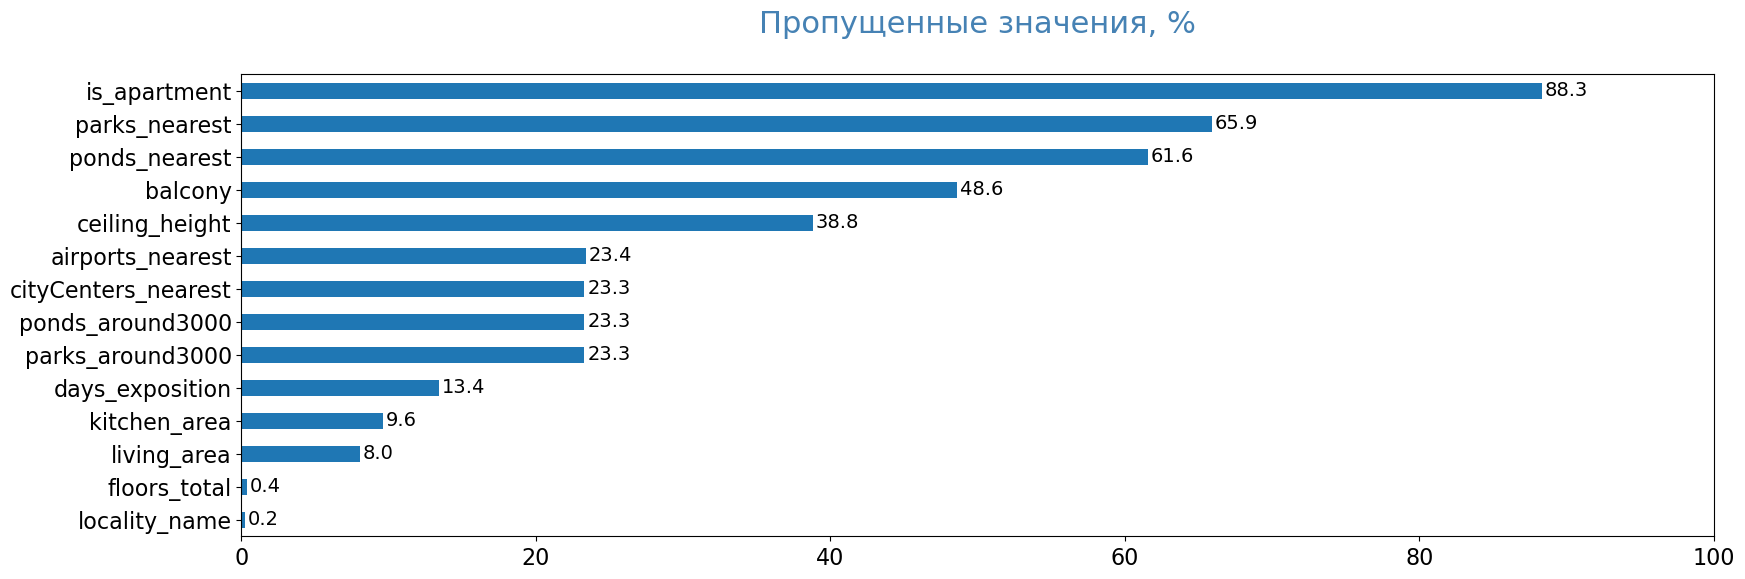

In [4]:
def pass_value_barh_1(df):
    
    fig, ax = plt.subplots(figsize=(19, 6))
    
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19,6), legend=False, fontsize=16, ax = ax)
            .set_title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        );

        plt.xlim(0, 100)
    
        for i in ax.patches:
            plt.text(i.get_width()+0.2, i.get_y()+0.1,
                     str(round((i.get_width()), 1)),
                     fontsize=14, 
                     color='black')
    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции')
        
pass_value_barh_1(data)

In [5]:
data['balcony'] = data['balcony'].fillna(0)
display(data['balcony'].isna().sum())

0

In [6]:
data = data.dropna(subset=['floors_total'])

##### Причины, которые могли привести к пропускам в данных:
1. Технологические: данные могли быть потеряны при копировании, использовании, смене формата и прочее. Также к причинам пропуска послужили неполучение картографических данных от сервиса Яндекс. 
Рекомендации к улучшению: рекомендуется проверить сервис на предоставление картографических данных, в частности в локациях, где данные пропущены. Установить и устранить причины возникновения ошибки (в данном случае ошибкой явлется непредоставление картографиечксих данных).
2. Человеческие: пропущенные данные изначально не были внесены в датасет. Причины могут быть разными: на момент внесения не были известны пропущенные значения, посчитали необязательным внести опеределенные данные.
Рекомендации к улучшению: определить необходимые критические данные для анализа, сделать ввод этих значений обязательными при регистрации объекта на сервисе.

#### Рассмотрим типы данных в каждом столбце

In [7]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int64         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

##### Результат
Выше преобразовали типы данных в 4х столбцах. Это выполнено для удобства дальнейших расчетов и анализов, для удобства в чтении данных, а также для сокращения объемов данных. 
В частности, перевели типы данных object в булев тип, object - в тип datetime. Также целесообразно перевести некоторые столбцы, хранящие вещественные числа float - в целые int для экономии объемов памяти и в связи с тем, что значения по этим параметрам могут быть только целочисленные. Так было сделано для столбцов floors_total и balcony.

#### Изучим уникальные значения в столбце с названиями населенных пунктов. Удалим явные и неявные дубликаты.

In [8]:
data.locality_name.nunique()

364

In [9]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [10]:
data.duplicated().sum()

0

Создадим функцию по поиску неявных дубликатов в названиях населенных пунктов

In [11]:
def duplicate_finder(data):
    locations = pd.Series(data['locality_name'].unique().tolist())
    duplicates = dict()   
    for string in locations:
        string = str(string)
        for i in range(len(string)):
            short_string = ''
            try:
                if string[i].isupper():
                    short_string += string[i] + string[i+1] + string[i+2]
                    duplicates[short_string] = duplicates.get(short_string,[]) + [string]
            except:
                break
    return duplicates

#распечатаем только те элементы словаря, в которых больше 1 значения
def print_duplicates(duplicates):
    for key, value in duplicates.items():
        if len(value)>1:
            print(key, ':', value)

print_duplicates(duplicate_finder(data))


Пет : ['Санкт-Петербург', 'Петергоф', 'посёлок Петровское', 'посёлок Петро-Славянка', 'поселок Петровское']
Яни : ['городской посёлок Янино-1', 'городской поселок Янино-1']
Пар : ['посёлок Парголово', 'деревня Парицы']
Мур : ['посёлок Мурино', 'поселок Мурино', 'Мурино']
Сер : ['Сертолово', 'поселок Серебрянский']
Пуш : ['Пушкин', 'поселок Пушное']
Куд : ['деревня Кудрово', 'Кудрово']
Ком : ['Коммунар', 'поселок Коммунары']
Кол : ['Колпино', 'деревня Большие Колпаны', 'деревня Колтуши', 'деревня Малые Колпаны']
Кра : ['поселок городского типа Красный Бор', 'Красное Село', 'посёлок городского типа Красный Бор', 'поселок Красная Долина', 'посёлок Форт Красная Горка', 'поселок Красносельское']
Бор : ['поселок городского типа Красный Бор', 'Сосновый Бор', 'посёлок городского типа Красный Бор', 'деревня Чудской Бор', 'деревня Бор', 'деревня Трубников Бор', 'посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор', 'деревня Борисова Грива']
Фёд : ['деревня Фёдоровское', 'городской пос

In [12]:
data.locality_name = data.locality_name.str.replace('посёлок', 'поселок')
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок городского типа')
data.locality_name = data.locality_name.str.replace('поселок при железнодорожной станции', 'поселок станции')
data.locality_name = data.locality_name.str.replace('поселок Рябово', 'поселок городского типа Рябово')
data.locality_name = data.locality_name.str.replace('деревня Кудрово', 'Кудрово')
data.locality_name = data.locality_name.str.replace('поселок Мурино', 'Мурино')
data.locality_name = data.locality_name.str.replace('деревня Фёдоровское', 'поселок городского типа Фёдоровское')
data.locality_name = data.locality_name.str.replace('деревня Зимитицы', 'поселок Зимитицы')
data.locality_name = data.locality_name.str.replace('деревня Рабитицы', 'поселок Рабитицы')
data.locality_name = data.locality_name.str.replace('деревня Щеглово', 'поселок Щеглово')
data.locality_name = data.locality_name.str.replace('поселок Гарболово', 'деревня Гарболово')
locality_list_sorted = sorted(data['locality_name'].astype(str).unique())
display(locality_list_sorted)

['nan',
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Гли

In [13]:
data.locality_name.nunique()

313

##### Вывод:
Явных дубликатов в столбце с названиями населенных пунктов нет. Удалены неявные дубликаты по следующим признакам:
1. слова "посёлок" в названиях заменены все на "поселок"
2. тип поселения "городской поселок" заменен на "поселок городского типа", так как административного деления "городской поселок" не существует
3. тип поселения "поселок при железнодорожной станции" заменен на "поселок станции", так как административного деления "поселок при железнодорожной станции" не существует
4. "поселок Рябово" заменен на "поселок городского типа Рябово" в соответствии с актуальными данными Яндекс карта.
5. "деревня Кудрово" заменен на "Кудрово" в соответствии с актуальными данными Яндекс карта. С 2018 года деревне Кудрово был присвоен статус города.
6. "поселок Мурино" заменен на "Мурино" в соответствии с актуальными данными Яндекс карта
7. "деревня Фёдоровское" заменен на "поселок городского типа Фёдоровское" в соответствии с актуальными данными Яндекс карта и для укрупнения населенного пункта (деревня входит в состав поселка городского типа).
8. "деревня Зимитицы" заменен на "поселок Зимитицы" в соответствии с актуальными данными Яндекс карта  и для укрупнения населенного пункта (деревня входит в состав поселения).
9. "деревня Рабитицы" заменен на "поселок Рабитицы" в соответствии с актуальными данными Яндекс карта  и для укрупнения населенного пункта (деревня входит в состав поселения).
10. "деревня Щеглово" заменен на "поселок Щеглово" в соответствии с актуальными данными Яндекс карта  и для укрупнения населенного пункта (деревня входит в состав поселения).
11. "поселок Гарболово" заменен на "деревня Гарболово" в соответствии с актуальными данными Яндекс карта 


#### Найдем и устраним редкие и выбивающиеся значения.

##### Сначала рассмотрим числовые описания по выбранным показателям:

In [14]:
columns_list = ['balcony', 'ceiling_height', 'days_exposition', 'floor', 'floors_total', 'kitchen_area', 
                'last_price', 'living_area', 'parks_around3000', 'ponds_around3000','rooms', 'total_area', 
                'total_images']
for col in columns_list:
    display(data[col].describe())
data.loc[data['ceiling_height'] > 10.0, ['ceiling_height']] = data['ceiling_height']/10
display(data['ceiling_height'].describe())


count    23613.000000
mean         0.593063
std          0.960307
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

count    21382.000000
mean        10.564128
std          5.904316
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

count    18105.000000
mean         0.611433
std          0.802168
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

count    18105.000000
mean         0.770119
std          0.939075
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

count    23613.000000
mean         9.874518
std          5.681541
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

count    14495.000000
mean         2.728069
std          0.299935
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [15]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,613.00","23,613.00","14,495.00","20,441.00","23,613.00","21,743.00","21,382.00","23,613.00","23,613.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,10.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00


###### Вывод
Обнаружены аномальные значения в столбце 'ceiling_height'. Вероятнее всего, что ошибка произошла при вводе данных - неправильно была указана десятичная дробь (запятую или точку поставили не в том месте). В результате чего, значения превышают нормальные значения в 10 раз. Корректные значения этих данных восстановлены.
Рекомендация к улучшению: в системе при вводе данных установить минимальные и максимальные значения высоты потолков в зависимости от типа недвижимости. 

##### Рассмотрим и устраним аномальные значения в столбцах 'total_area', 'ceiling_height', 'days_exposition',  'last_price', 'living_area',  'kitchen_area'

In [16]:
data.total_area.value_counts().to_frame()

,total_area
45.00,419
42.00,383
60.00,347
31.00,346
44.00,345
...,...
58.71,1
60.75,1
63.19,1
237.00,1


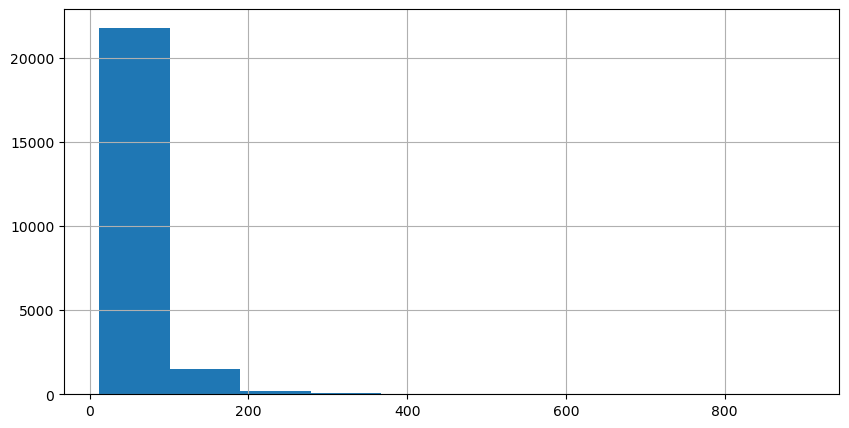

In [17]:
data.total_area.hist(bins=10, figsize=(10, 5));

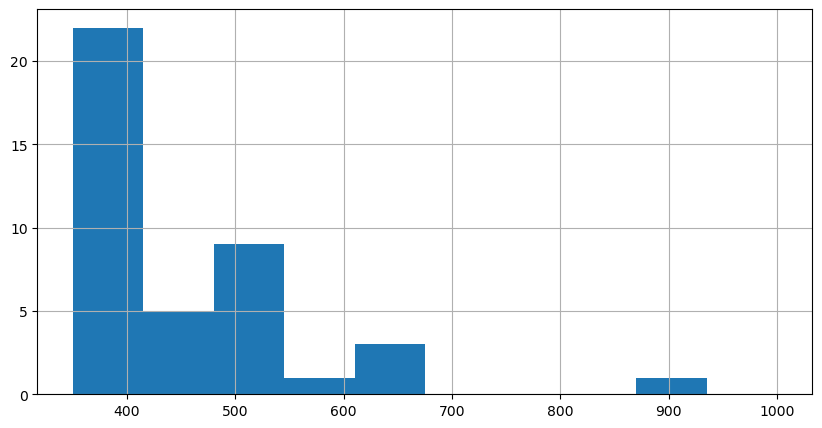

In [18]:
data.total_area.hist(bins=10, figsize=(10, 5), range=(350, 1000));

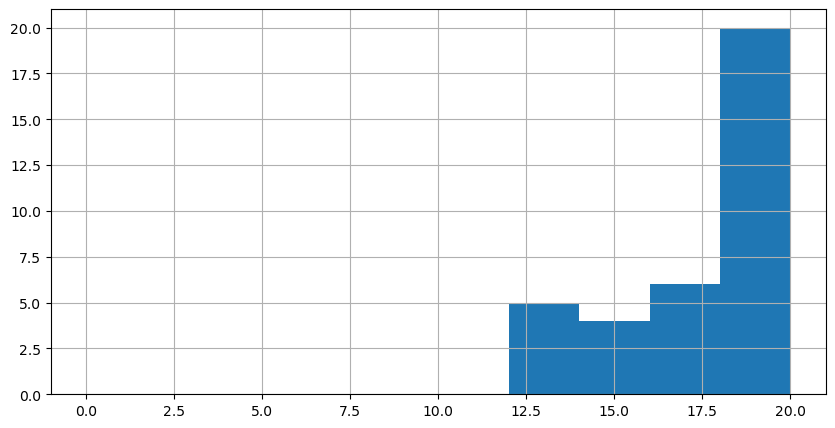

In [19]:
data.total_area.hist(bins=10, figsize=(10, 5), range=(0, 20));

Гистограммы показывают, что значания по параметру 'total_area', выходящие за пределы значений 20-350кв.м., являются очень редкими. Устраняем данные строки из датафрейма. 

In [20]:
data = data[(data['total_area'] < 350) & (data['total_area'] > 20) | (data['total_area'].isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23537 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23537 non-null  int64         
 1   last_price            23537 non-null  float64       
 2   total_area            23537 non-null  float64       
 3   first_day_exposition  23537 non-null  datetime64[ns]
 4   rooms                 23537 non-null  int64         
 5   ceiling_height        14450 non-null  float64       
 6   floors_total          23537 non-null  int64         
 7   living_area           21690 non-null  float64       
 8   floor                 23537 non-null  int64         
 9   is_apartment          23537 non-null  bool          
 10  studio                23537 non-null  bool          
 11  open_plan             23537 non-null  bool          
 12  kitchen_area          21344 non-null  float64       
 13  balcony         

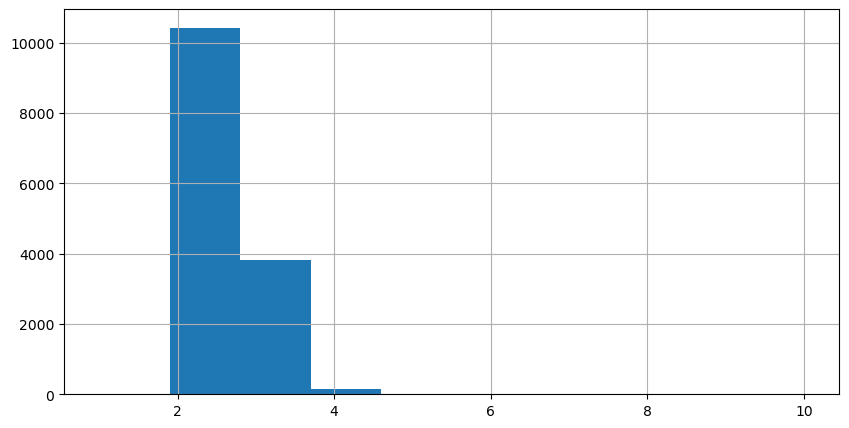

In [21]:
data.ceiling_height.hist(bins=10, figsize=(10, 5));

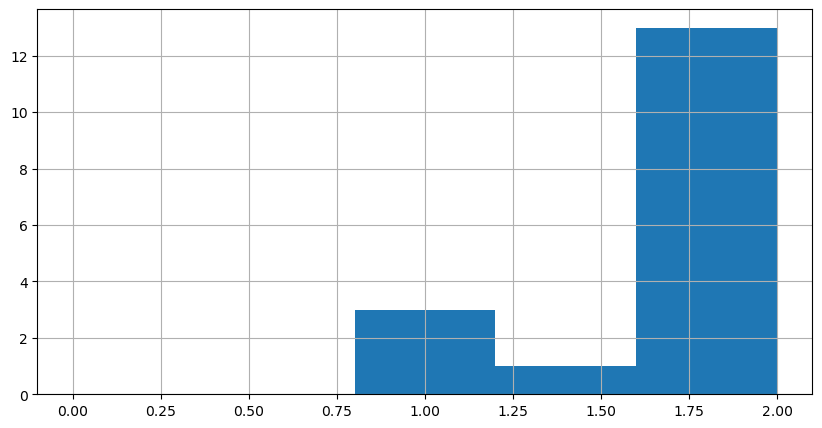

In [22]:
data.ceiling_height.hist(bins=5, figsize=(10, 5), range=(0, 2));

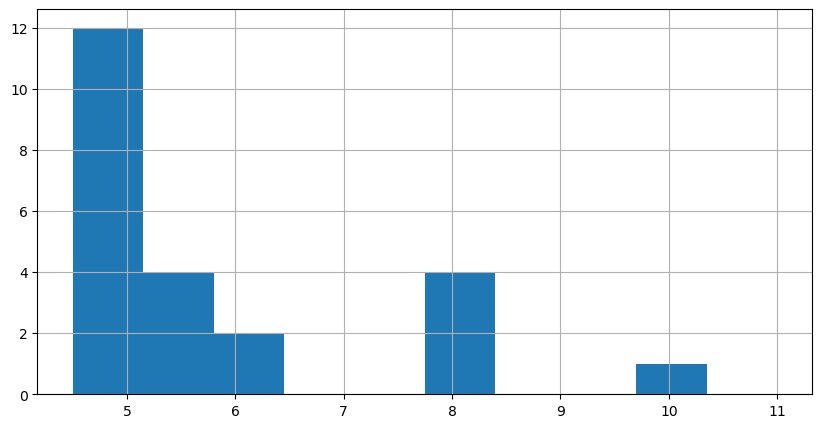

In [23]:
data.ceiling_height.hist(bins=10, figsize=(10, 5), range=(4.5, 11));

Гистограммы показывают, что значания по параметру 'ceiling_height', выходящие за пределы значений 1-4.5м., являются очень редкими. Устраняем данные строки из датафрейма.

In [24]:
data = data[(data['ceiling_height'] > 1) & (data['ceiling_height'] < 4.5) | (data['ceiling_height'].isna())]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23513 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23513 non-null  int64         
 1   last_price            23513 non-null  float64       
 2   total_area            23513 non-null  float64       
 3   first_day_exposition  23513 non-null  datetime64[ns]
 4   rooms                 23513 non-null  int64         
 5   ceiling_height        14426 non-null  float64       
 6   floors_total          23513 non-null  int64         
 7   living_area           21668 non-null  float64       
 8   floor                 23513 non-null  int64         
 9   is_apartment          23513 non-null  bool          
 10  studio                23513 non-null  bool          
 11  open_plan             23513 non-null  bool          
 12  kitchen_area          21324 non-null  float64       
 13  balcony         

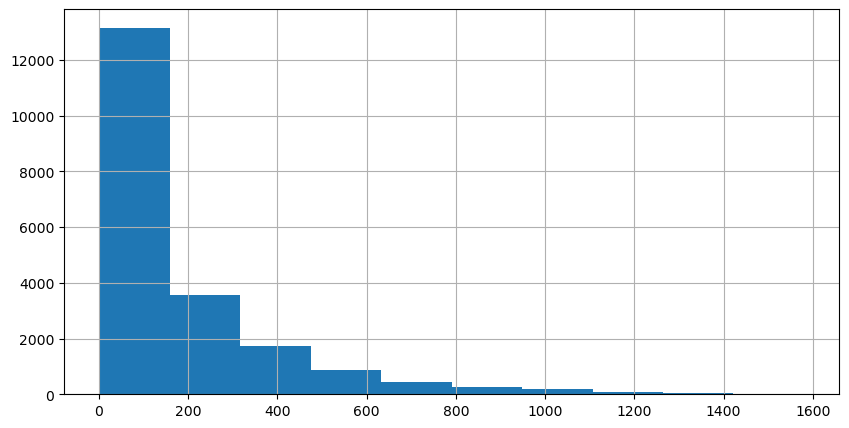

In [25]:
data.days_exposition.hist(bins=10, figsize=(10, 5));

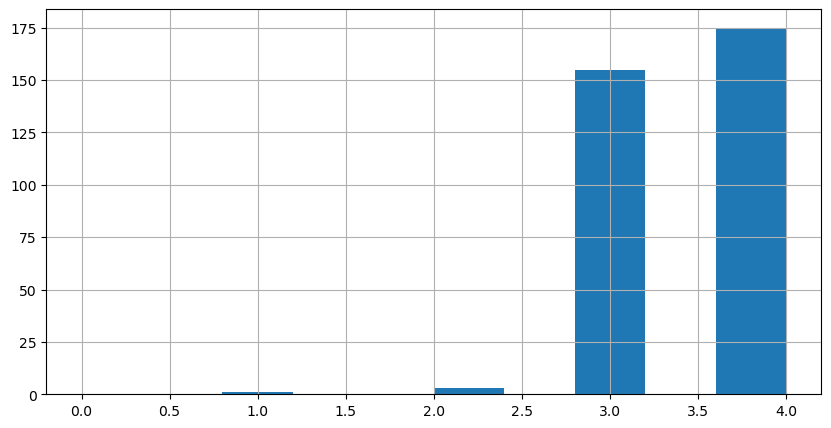

In [26]:
data.days_exposition.hist(bins=10, figsize=(10, 5), range=(0, 4));

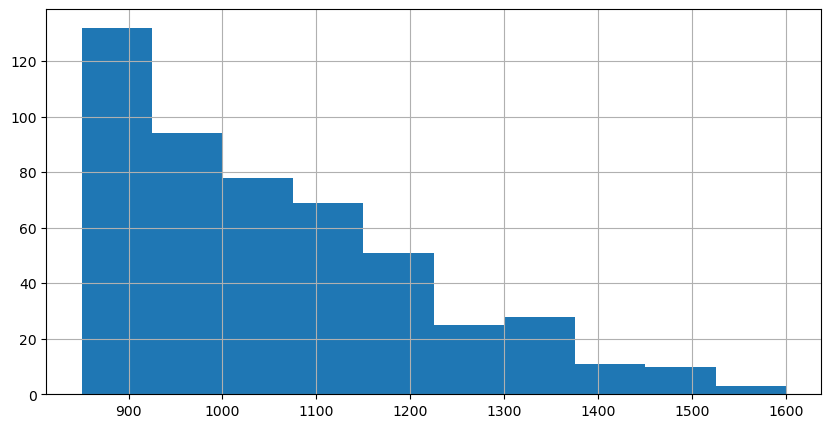

In [27]:
data.days_exposition.hist(bins=10, figsize=(10, 5), range=(850, 1600));

Гистограммы показывают, что значания по параметру 'days_exposition', выходящие за пределы значений 3-1220, являются очень редкими. Устраняем данные строки из датафрейма. 

In [28]:
data = data[(data['days_exposition'] > 3) & (data['days_exposition'] < 1220) | (data['days_exposition'].isna())]
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23431 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23431 non-null  int64         
 1   last_price            23431 non-null  float64       
 2   total_area            23431 non-null  float64       
 3   first_day_exposition  23431 non-null  datetime64[ns]
 4   rooms                 23431 non-null  int64         
 5   ceiling_height        14367 non-null  float64       
 6   floors_total          23431 non-null  int64         
 7   living_area           21591 non-null  float64       
 8   floor                 23431 non-null  int64         
 9   is_apartment          23431 non-null  bool          
 10  studio                23431 non-null  bool          
 11  open_plan             23431 non-null  bool          
 12  kitchen_area          21246 non-null  float64       
 13  balcony         

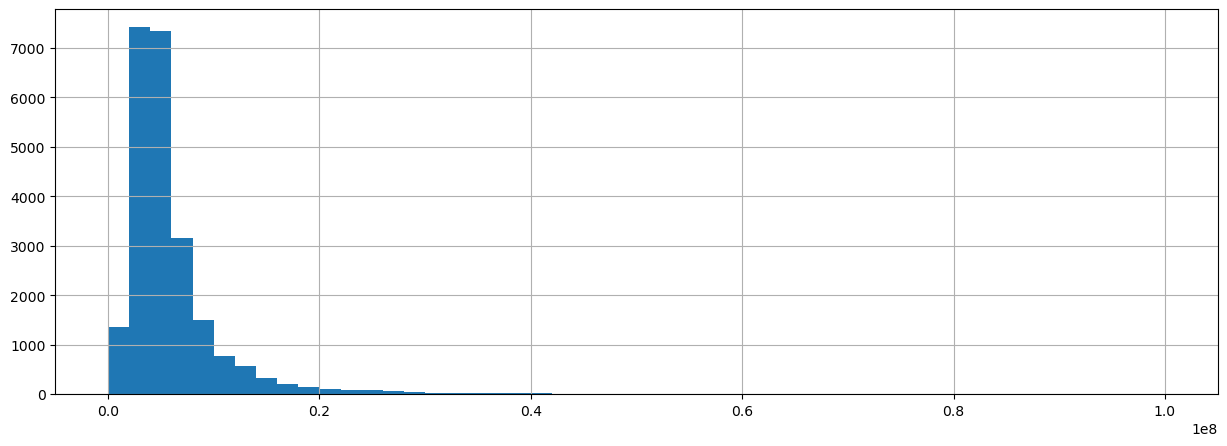

In [29]:
data.last_price.hist(bins=50, figsize=(15, 5), range=(0, 100000000));

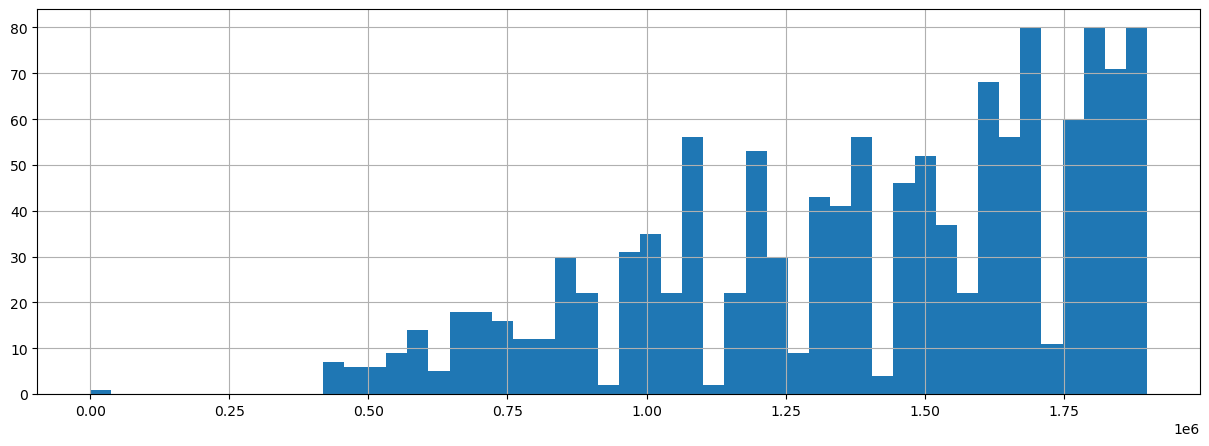

In [30]:
data.last_price.hist(bins=50, figsize=(15, 5), range=(0, 1900000));

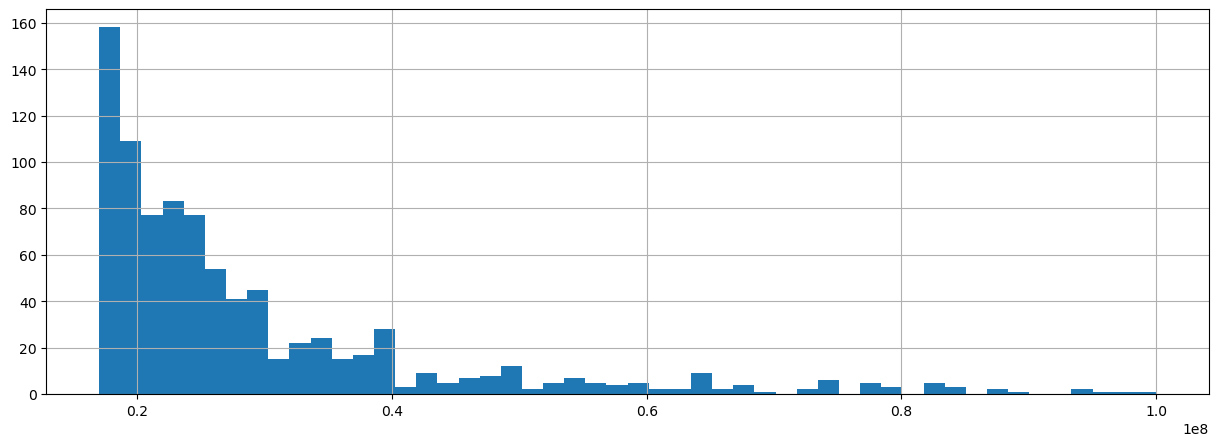

In [31]:
data.last_price.hist(bins=50, figsize=(15, 5), range=(17000000, 100000000));

Гистограммы показывают, что значания по параметру 'last_price', выходящие за пределы значений 800тыс.-70млн., являются очень редкими. Устраняем данные строки из датафрейма. 

In [32]:
data = data[(data['last_price'] > 800000) & (data['last_price'] < 70000000) | (data['last_price'].isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23255 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23255 non-null  int64         
 1   last_price            23255 non-null  float64       
 2   total_area            23255 non-null  float64       
 3   first_day_exposition  23255 non-null  datetime64[ns]
 4   rooms                 23255 non-null  int64         
 5   ceiling_height        14282 non-null  float64       
 6   floors_total          23255 non-null  int64         
 7   living_area           21441 non-null  float64       
 8   floor                 23255 non-null  int64         
 9   is_apartment          23255 non-null  bool          
 10  studio                23255 non-null  bool          
 11  open_plan             23255 non-null  bool          
 12  kitchen_area          21102 non-null  float64       
 13  balcony         

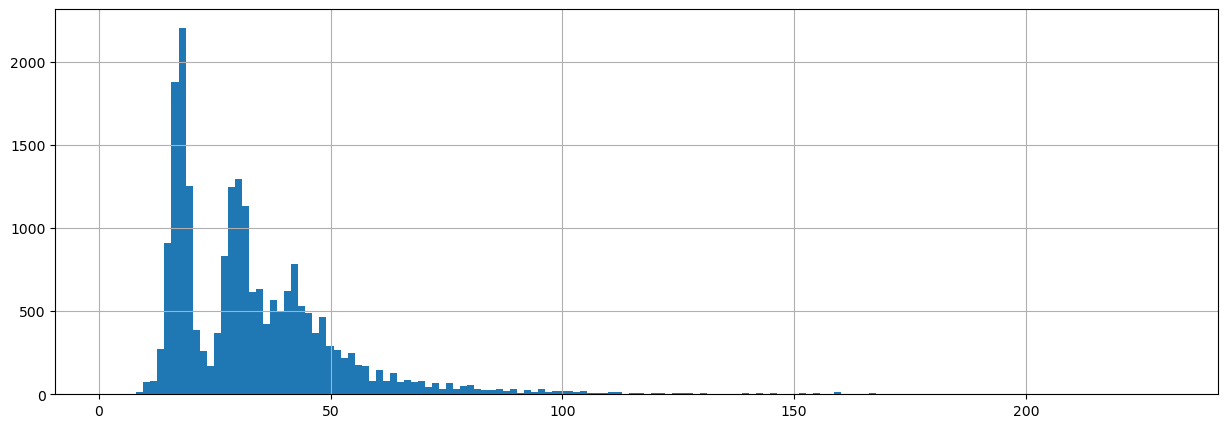

In [33]:
data.living_area.hist(bins=150, figsize=(15, 5));

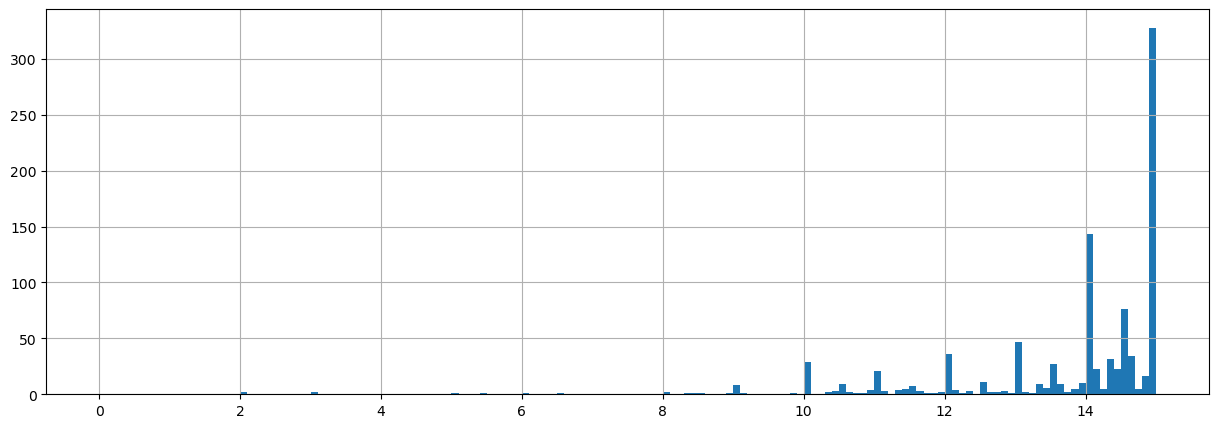

In [34]:
data.living_area.hist(bins=150, figsize=(15, 5), range=(0, 15));

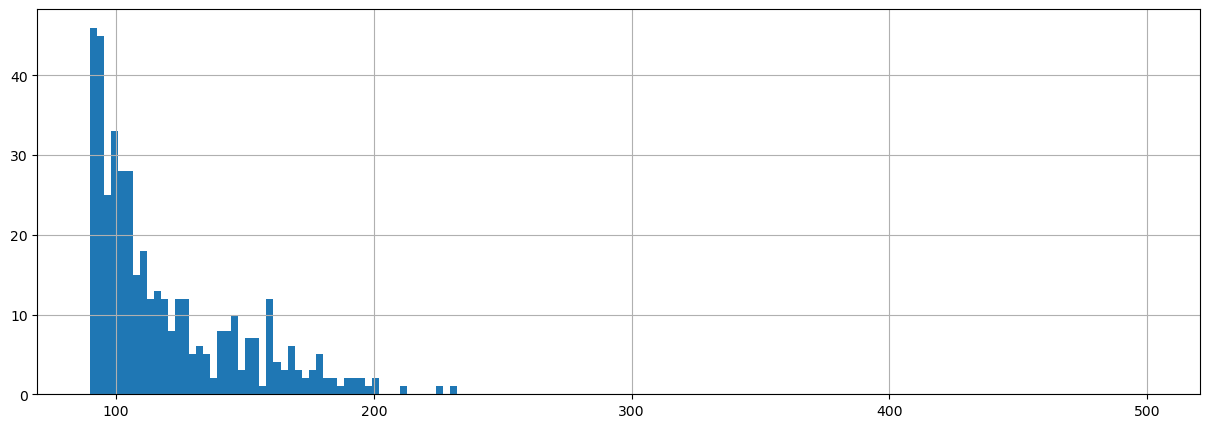

In [35]:
data.living_area.hist(bins=150, figsize=(15, 5), range=(90, 500));

Гистограммы показывают, что значания по параметру 'living_area', выходящие за пределы значений 12-140 кв.м., являются очень редкими. Устраняем данные строки из датафрейма. 

In [36]:
data = data[(data['living_area'] > 12) & (data['living_area'] < 140) | (data['living_area'].isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23004 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23004 non-null  int64         
 1   last_price            23004 non-null  float64       
 2   total_area            23004 non-null  float64       
 3   first_day_exposition  23004 non-null  datetime64[ns]
 4   rooms                 23004 non-null  int64         
 5   ceiling_height        14145 non-null  float64       
 6   floors_total          23004 non-null  int64         
 7   living_area           21190 non-null  float64       
 8   floor                 23004 non-null  int64         
 9   is_apartment          23004 non-null  bool          
 10  studio                23004 non-null  bool          
 11  open_plan             23004 non-null  bool          
 12  kitchen_area          20876 non-null  float64       
 13  balcony         

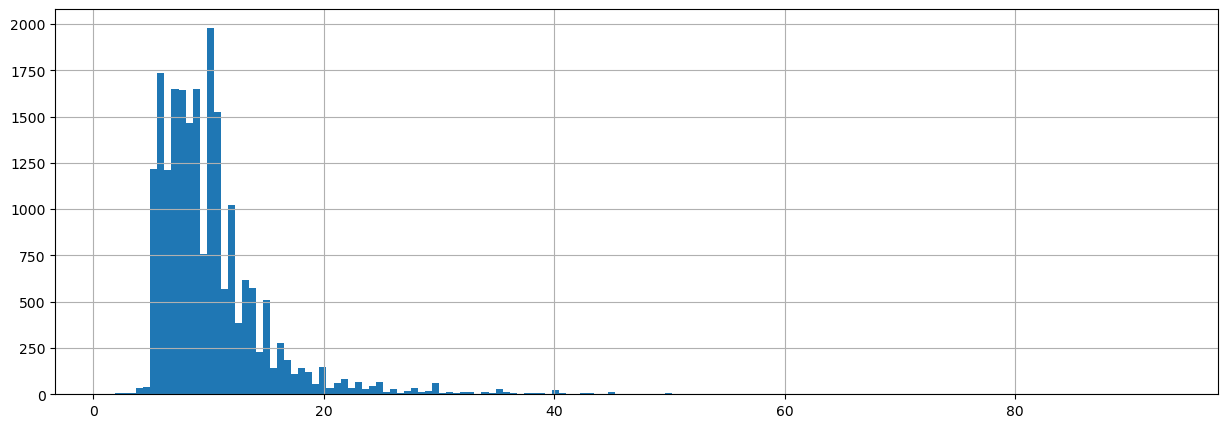

In [37]:
data.kitchen_area.hist(bins=150, figsize=(15, 5));

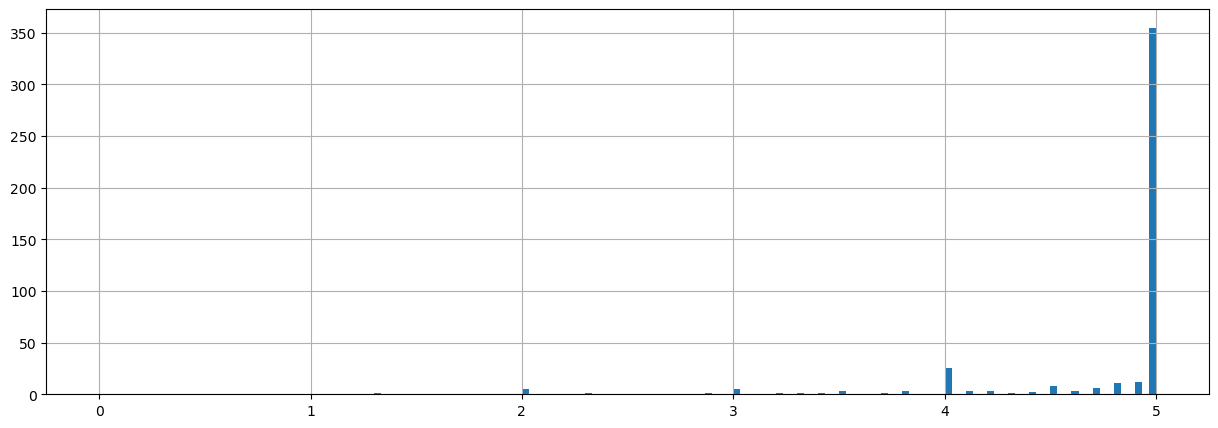

In [38]:
data.kitchen_area.hist(bins=150, figsize=(15, 5), range=(0, 5));

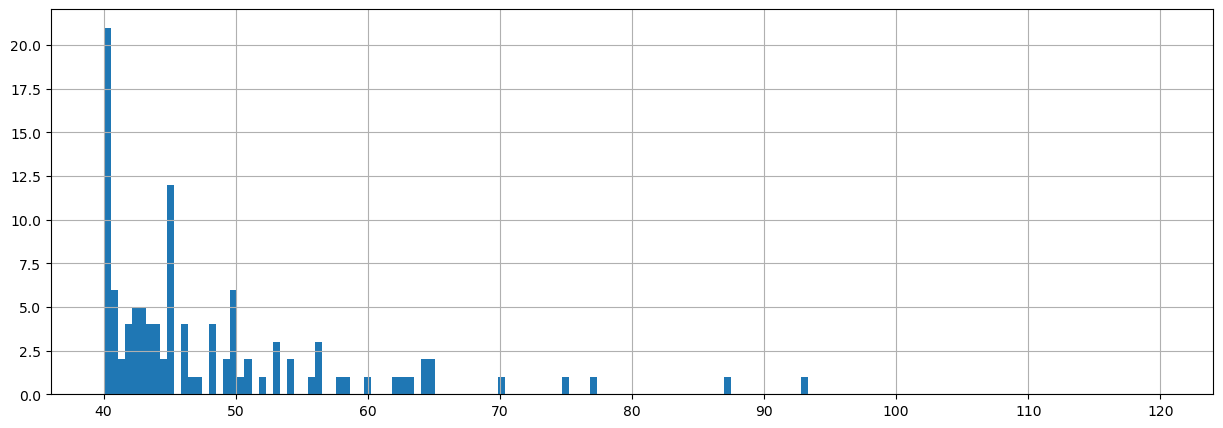

In [39]:
data.kitchen_area.hist(bins=150, figsize=(15, 5), range=(40, 120));

Гистограммы показывают, что значания по параметру 'kitchen_area', выходящие за пределы значений 4.9-41 кв.м., являются очень редкими. Устраняем данные строки из датафрейма. 

In [40]:
data = data[(data['kitchen_area'] > 4.9) & (data['kitchen_area'] < 41) | (data['kitchen_area'].isna())]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22818 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22818 non-null  int64         
 1   last_price            22818 non-null  float64       
 2   total_area            22818 non-null  float64       
 3   first_day_exposition  22818 non-null  datetime64[ns]
 4   rooms                 22818 non-null  int64         
 5   ceiling_height        14018 non-null  float64       
 6   floors_total          22818 non-null  int64         
 7   living_area           21014 non-null  float64       
 8   floor                 22818 non-null  int64         
 9   is_apartment          22818 non-null  bool          
 10  studio                22818 non-null  bool          
 11  open_plan             22818 non-null  bool          
 12  kitchen_area          20690 non-null  float64       
 13  balcony         

###### Вывод:
Анализируя данные с помощью гистограмм и числовых описаний (describe) устранили аномальные значения. В результате чего число строк таблицы уменьшилась на 3.36% (Было 23613, стало 22818) 

### Посчитаем и добавим в таблицу новые столбцы

In [41]:
data['price_per_square'] = (data['last_price'] / data['total_area']).round()
data['day_of_the_week'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_of_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

display(data['floor'].unique())

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 'NaN':
        return NaN
    if row['floor'] == -1:
        return 'цокольный'
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)

data['cityCenters_nearest'] = np.round((data['cityCenters_nearest']/1000))
display(data.shape)
display(data['cityCenters_nearest'].unique())
display(data.head())
data.info()


array([ 8,  1,  4,  9,  5, 22, 26,  7,  3,  2, 11, 15, 18,  6, 13, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

(22818, 27)

array([16., 19., 14.,  7., nan, 12., 15., 52., 33., 31., 11., 13., 10.,
        2., 32.,  4., 17., 30.,  5., 51.,  8., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25., 66., 47., 40., 57.,  0., 37., 41., 43., 48.,
       62., 39., 65., 54., 42., 59., 45., 61., 63., 60.])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square,day_of_the_week,month_of_exposition,year_of_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.0,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,82921.0,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,92786.0,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.0,4,7,2015,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,True,...,NaN,NaN,NaN,NaN,55.0,95066.0,0,9,2018,другой


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22818 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22818 non-null  int64         
 1   last_price            22818 non-null  float64       
 2   total_area            22818 non-null  float64       
 3   first_day_exposition  22818 non-null  datetime64[ns]
 4   rooms                 22818 non-null  int64         
 5   ceiling_height        14018 non-null  float64       
 6   floors_total          22818 non-null  int64         
 7   living_area           21014 non-null  float64       
 8   floor                 22818 non-null  int64         
 9   is_apartment          22818 non-null  bool          
 10  studio                22818 non-null  bool          
 11  open_plan             22818 non-null  bool          
 12  kitchen_area          20690 non-null  float64       
 13  balcony         

### Проведем исследовательский анализ данных

#### Изучим параметры и построим отдельные гистограммы для каждого из них

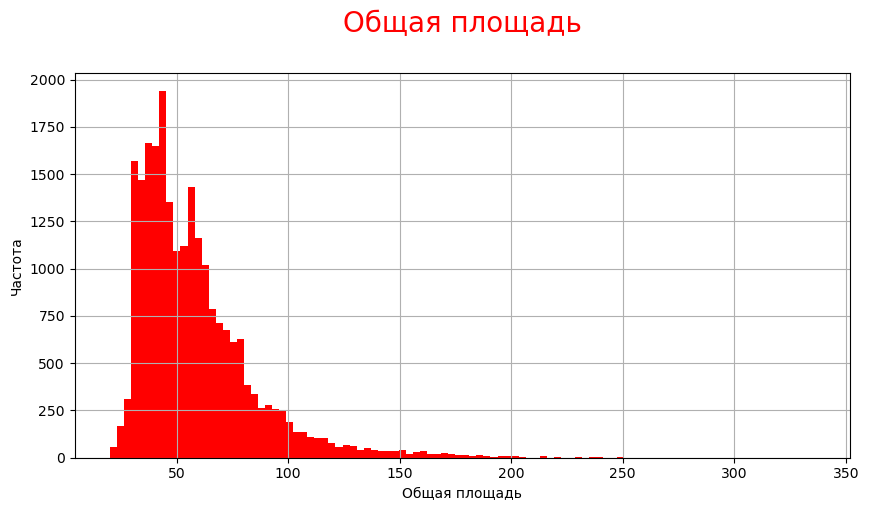

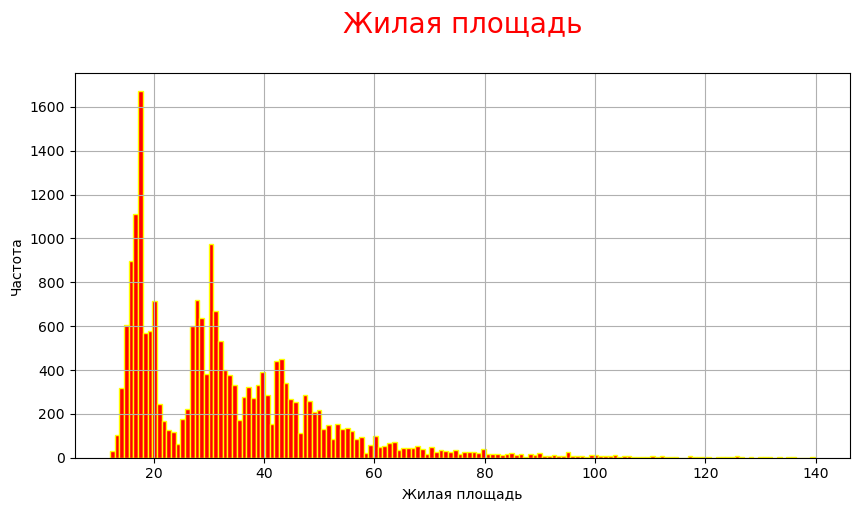

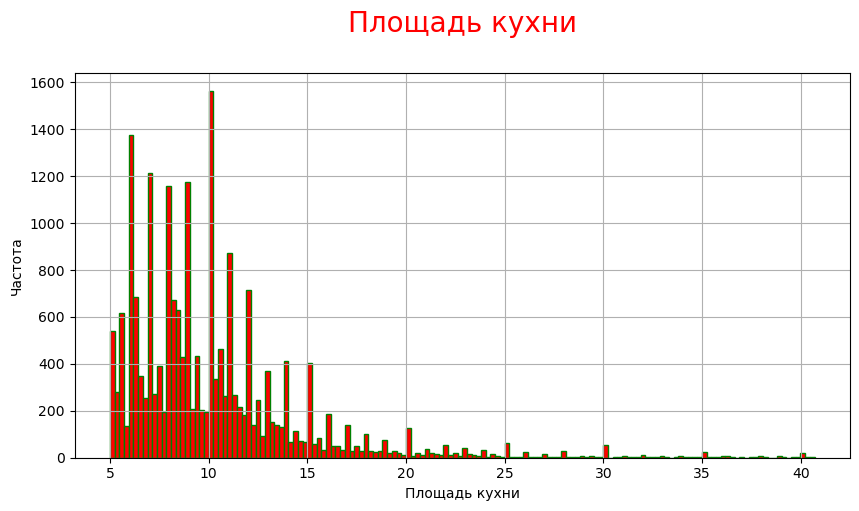

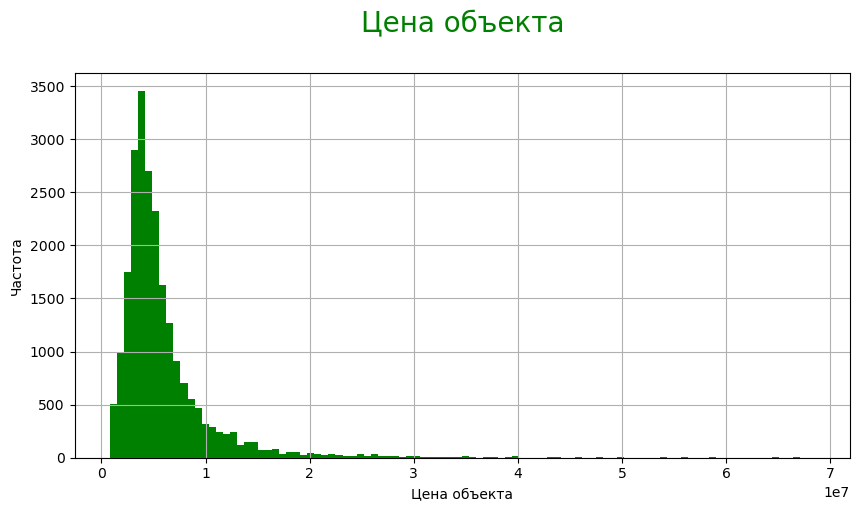

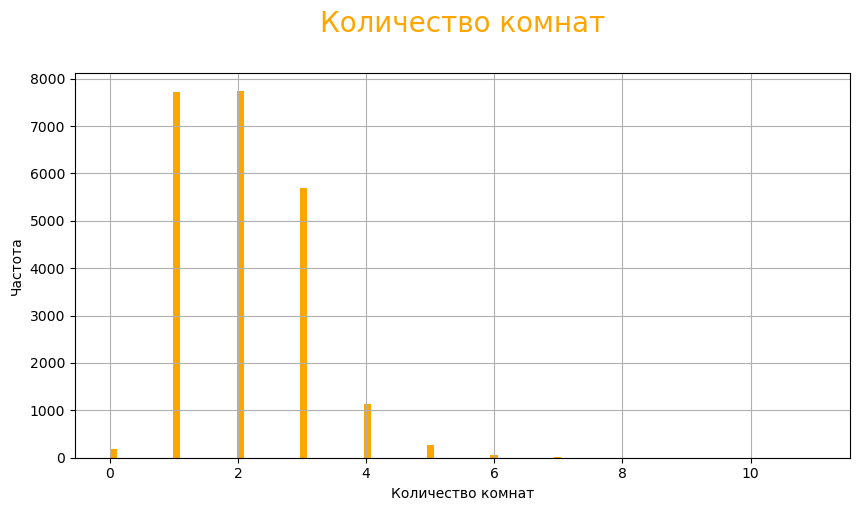

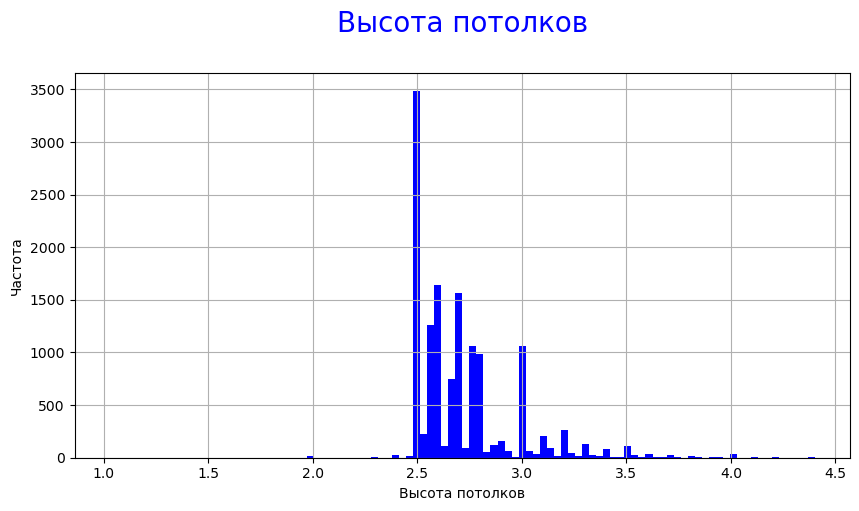

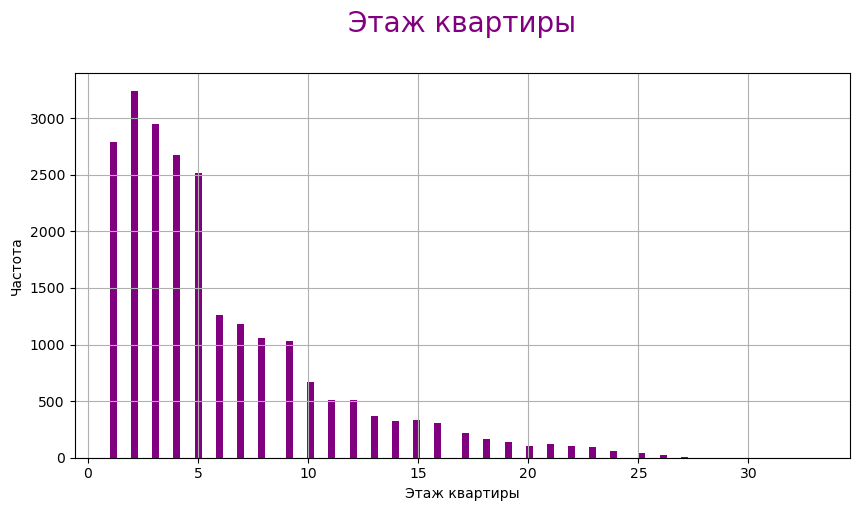

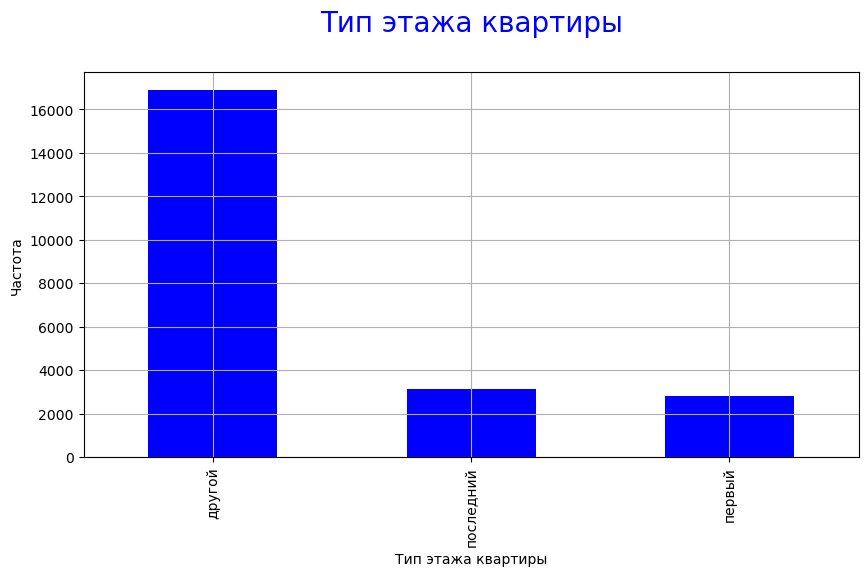

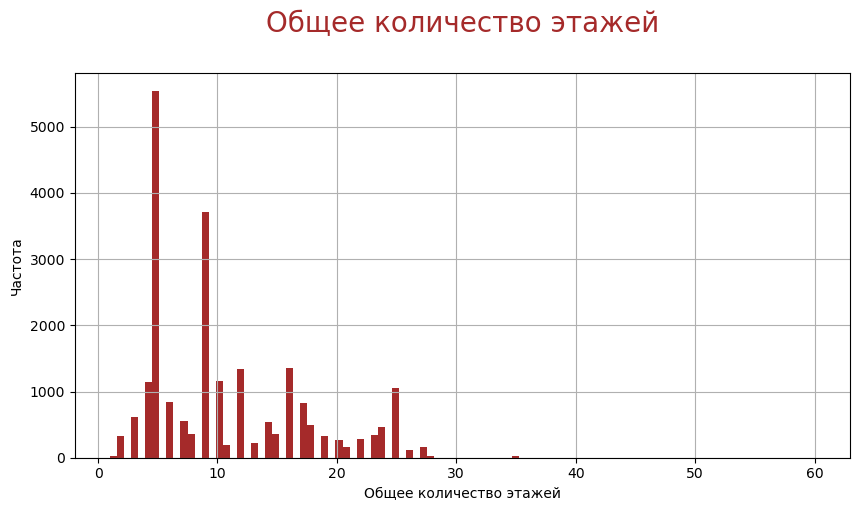

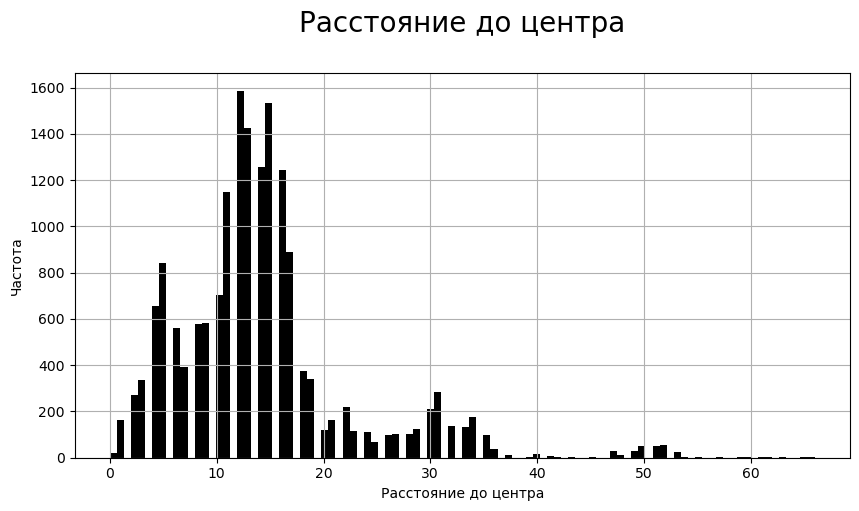

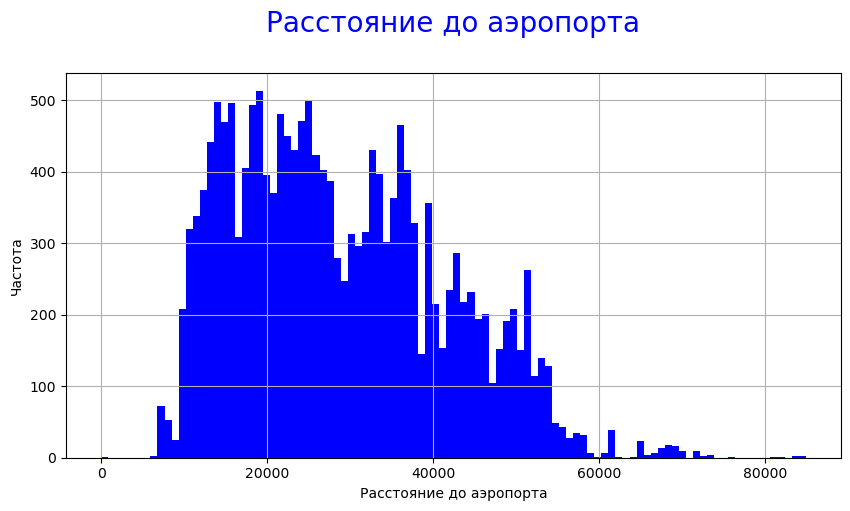

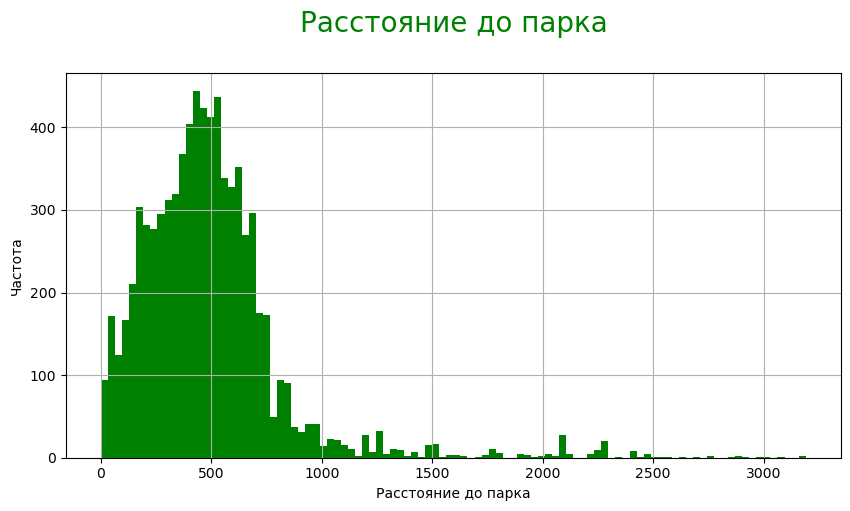

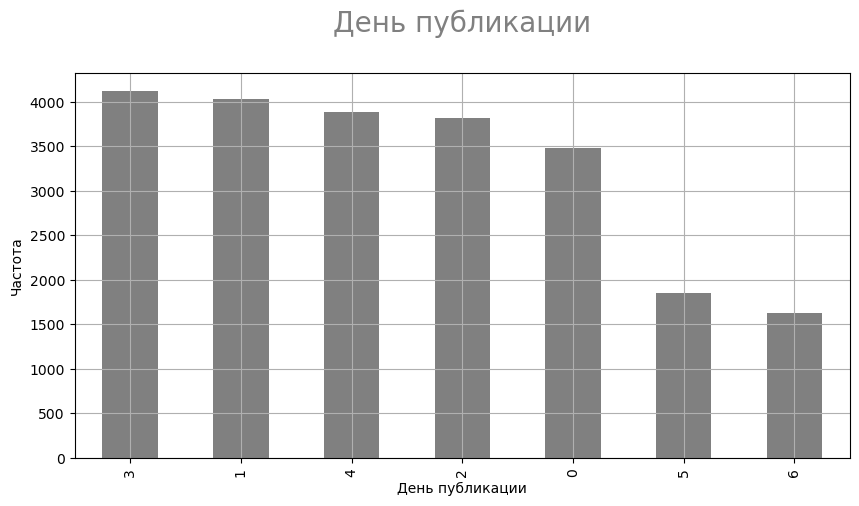

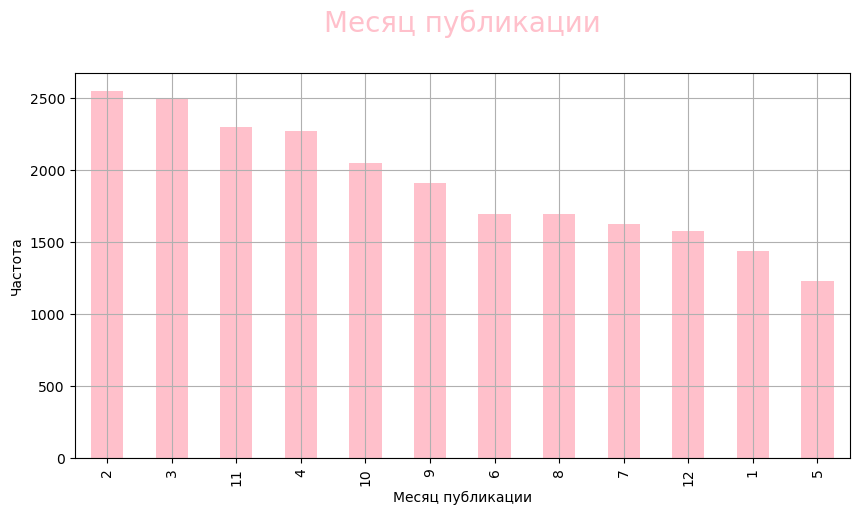

In [42]:
data['total_area'].plot(kind='hist', bins=100, figsize=(10, 5), color='red', 
                        grid=True)
plt.ylabel('Частота')
plt.xlabel('Общая площадь')
plt.title('Общая площадь' + "\n", fontsize = 20, color = 'red')
plt.show()

data['living_area'].plot(kind='hist', bins=150, figsize=(10, 5), color='red', 
                         edgecolor='yellow', grid=True)
plt.ylabel('Частота')
plt.xlabel('Жилая площадь')
plt.title('Жилая площадь' + "\n", fontsize = 20, color = 'red')
plt.show()

data['kitchen_area'].plot(kind='hist', bins=150, figsize=(10, 5), color='red', 
                          edgecolor='green', grid=True)
plt.ylabel('Частота')
plt.xlabel('Площадь кухни')
plt.title('Площадь кухни' + "\n", fontsize = 20, color = 'red')
plt.show()

data['last_price'].plot(kind='hist', bins=100, figsize=(10, 5),
                        color='green', grid=True)
plt.ylabel('Частота')
plt.xlabel('Цена объекта')
plt.title('Цена объекта' + "\n", fontsize = 20, color = 'green')
plt.show()

data['rooms'].plot(kind='hist', bins=100, figsize=(10, 5), color='orange', grid=True)
plt.ylabel('Частота')
plt.xlabel('Количество комнат')
plt.title('Количество комнат' + "\n", fontsize = 20, color = 'orange')
plt.show()

data['ceiling_height'].plot(kind='hist', bins=100, figsize=(10, 5), color='blue', grid=True)
plt.ylabel('Частота')
plt.xlabel('Высота потолков')
plt.title('Высота потолков' + "\n", fontsize = 20, color = 'blue')
plt.show()

data['floor'].plot(kind='hist', bins=100, figsize=(10, 5), color='purple', grid=True)
plt.ylabel('Частота')
plt.xlabel('Этаж квартиры')
plt.title('Этаж квартиры' + "\n", fontsize = 20, color = 'purple')
plt.show()

data['floor_category'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue', grid=True)
plt.ylabel('Частота')
plt.xlabel('Тип этажа квартиры')
plt.title('Тип этажа квартиры' + "\n", fontsize = 20, color = 'blue')
plt.show()

data['floors_total'].plot(kind='hist', bins=100, figsize=(10, 5), color='brown', grid=True)
plt.ylabel('Частота')
plt.xlabel('Общее количество этажей')
plt.title('Общее количество этажей' + "\n", fontsize = 20, color = 'brown')
plt.show()

data['cityCenters_nearest'].plot(kind='hist', bins=100, figsize=(10, 5),  
                          color='black', grid=True)
plt.ylabel('Частота')
plt.xlabel('Расстояние до центра')
plt.title('Расстояние до центра' + "\n", fontsize = 20, color = 'black')
plt.show()

data['airports_nearest'].plot(kind='hist', bins=100, figsize=(10, 5),  
                          color='blue', grid=True)
plt.ylabel('Частота')
plt.xlabel('Расстояние до аэропорта')
plt.title('Расстояние до аэропорта' + "\n", fontsize = 20, color = 'blue')
plt.show()

data['parks_nearest'].plot(kind='hist', bins=100, figsize=(10, 5), 
                          color='green', grid=True)
plt.ylabel('Частота')
plt.xlabel('Расстояние до парка')
plt.title('Расстояние до парка' + "\n", fontsize = 20, color = 'green')
plt.show()

data['day_of_the_week'].value_counts().plot(kind='bar', figsize=(10, 5), 
                                                 color='gray', grid=True)
plt.ylabel('Частота')
plt.xlabel('День публикации')
plt.title('День публикации' + "\n", fontsize = 20, color = 'gray')
plt.show()

data['month_of_exposition'].value_counts().plot(kind='bar', figsize=(10, 5), 
                                                 color='pink', grid=True)
plt.ylabel('Частота')
plt.xlabel('Месяц публикации')
plt.title('Месяц публикации' + "\n", fontsize = 20, color = 'pink')
plt.show()

##### Общие наблюдения:
1. Общая площадь: наиболее часто встречаются объекты с общей площадью 45 кв.м. Также пиковыми значениями являются 30 и 42 кв.м. Недвижимость площадью 60 кв.м. является самой распространенной среди недвижимости с площадью выше 50кв.м. 
2. Жилая площадь: наиболее часто встречаются объекты с жилой площадью 18 кв.м. Также пиковыми значениями являются 16 и 30 кв.м.
3. Площадь кухни: наиболее часто встречаются объекты с площадью 6 кв.м. Далее примерно одинаковыми пиковыми значениями являются 7, 8, 9 и 10 кв.м.
4. Наиболее часто совершаются сделки по цене от 3.5 до 5 млн.
5. Чаще всего размещаются объекты с количеством комнат 1 и 2. На втором месте - 3-х комнатные квартиры (или апартаменты). Квартиры-студии и квартиры с количесвтом комнат более 3х, представлены в данных в незначительном количестве.
6. Самое распространенное значение высоты потолков - 2.5м. Также распространена недвижимость с высотой потолков 2.6м. и 2.7м., но такие объекты встречаются в 2 раза меньше чем объекты с высотой потолков 2.5м.
7. Чаще всего публикуются объекты, расположенные на этажах с 1 по 5 включительно, реже всего публикуются объекты расположенные выше 10 этажа.
8. Количество объектов на первых и последних этажах меньше остальных объектов более чем в 6 раз.
9. 5ти и 9ти этажные дома являются самыми распротраненными в данных.
10. Большая часть недвижимости расположена от центра в промежутке от 11 до 17 км.
11. Большая часть недвижимости расположена от ближайшего аэропорта в промежутке от 13 до 19 км., а также на расстоянии 33-34, 37-38км.
12. Большая часть объектов находится достаточно близко к паркам, на расстоянии в 300-600м.
13. Большая часть объявлений публикуется в будние дни, в выходные - в 2 раза меньше.
14. Самая большая активность в публикации объявлений наблюдается начиная с февраля по март (по убывающей). Далее с сентября по ноябрь (по возрастанию) возобновляется актиность в публикациях. В летние месяцы, декабре и январе количество публикаций уменьшается. Меньше всего публикаций в мае месяце.


#### Рассмотрим как быстро продавались квартиры:

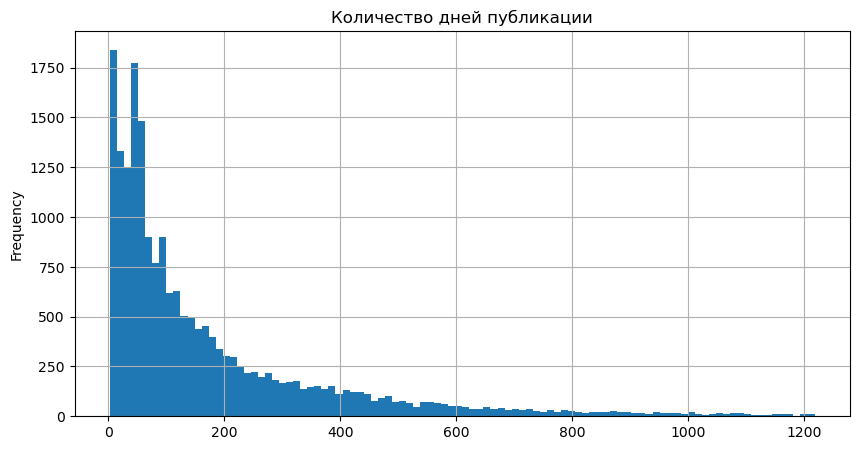

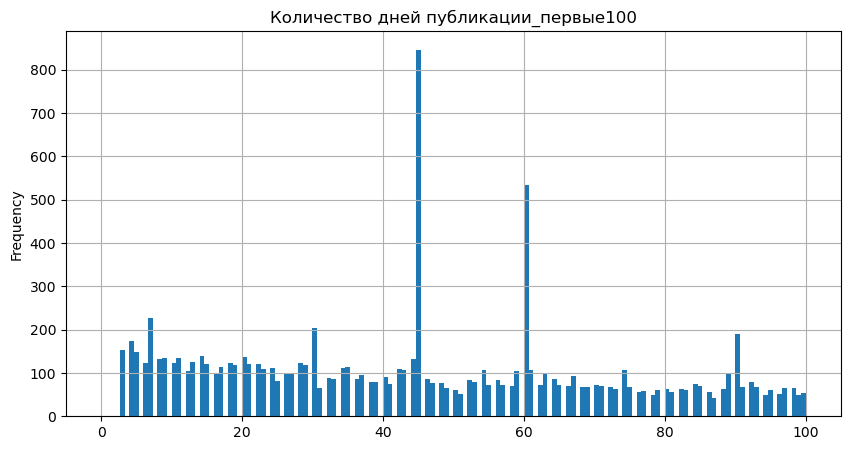

'Среднее значение количества дней публикации объявлений:'

176.0

'Медианное значение количества дней публикации объявлений:'

94.0

In [43]:
data['days_exposition'].plot(kind='hist', bins=100, figsize=(10, 5), title='Количество дней публикации',
                            grid=True)
plt.show()

data['days_exposition'].plot(kind='hist', bins=150, figsize=(10, 5), range=(0, 100),
                             title='Количество дней публикации_первые100', grid=True)
plt.show()
display('Среднее значение количества дней публикации объявлений:', data['days_exposition'].mean().round())
display('Медианное значение количества дней публикации объявлений:', data['days_exposition'].median())

In [44]:
display('Первый и третий квартили по занчению количество дней публкации:', data['days_exposition'].quantile([0.25, 0.75]))

'Первый и третий квартили по занчению количество дней публкации:'

0.25     45.0
0.75    227.0
Name: days_exposition, dtype: float64

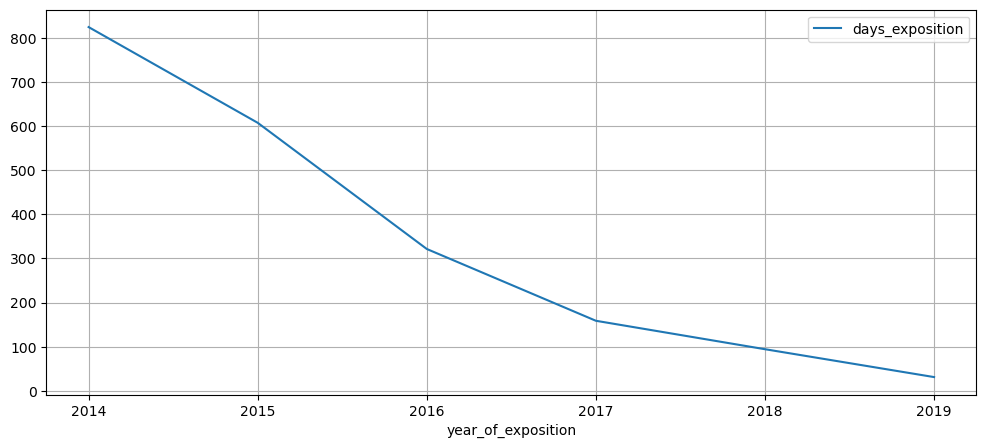

In [45]:
data.pivot_table(index='year_of_exposition', values='days_exposition').plot(grid=True, figsize=(12, 5))
plt.show()


##### Вывод:
Большее количество объектов было продано на 45-ый день после размещения объявления. Также распротранным временем с даты размещения до совершения сделки является 60 дней. 
Нужно отдельно отметить что на 7-ой день после публикации объявлений наблюдается некий пик по совершению сделок.
Необычно быстрыми сделками можно считать сделки совершенные первые 44 дня с момента публикации, необычно долгими - после 228 дней со дня публикации.
Наблюдая график зависимости года и скорости совершения сделок можно констатировать, что начиния с 2014 по 2019 скорость совершения сделок ежегодно росла на 25% и более и в 2019 году скорость продаж увеличилась более чем в 8 раз по сравнению с 2014 годом. 

#### Рассмотрим какие факторы больше всего влияют на общую (полную) стоимость объекта:

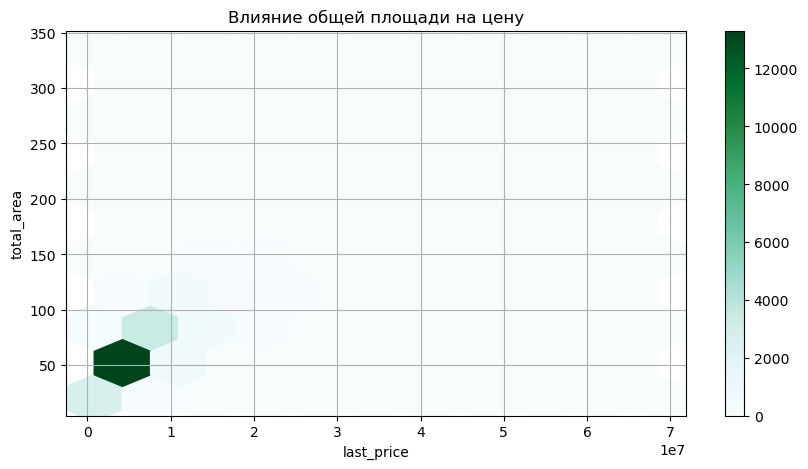

'Коэффициент корреляции между общей площадью и ценой:'

0.7535366206202189

In [46]:
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=10, figsize=(10, 5), sharex=False, 
          grid=True, title='Влияние общей площади на цену')
plt.show()
display('Коэффициент корреляции между общей площадью и ценой:', data['last_price'].corr(data['total_area']))

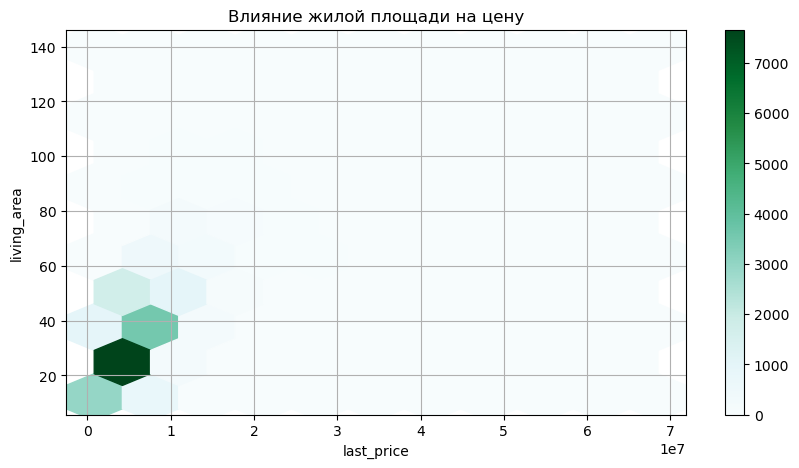

'Коэффициент корреляции между жилой площадью и ценой:'

0.6547005311066603

In [47]:
data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=10, figsize=(10, 5), 
          sharex=False, grid=True, title='Влияние жилой площади на цену')
plt.show()
display('Коэффициент корреляции между жилой площадью и ценой:', data['last_price'].corr(data['living_area']))

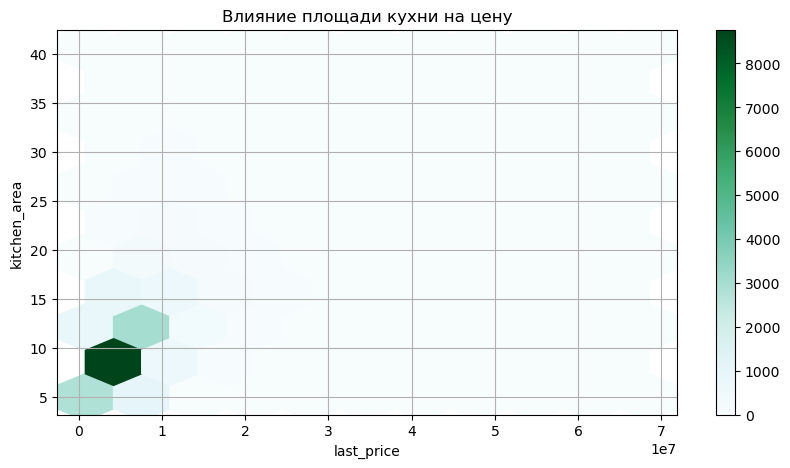

'Коэффициент корреляции между площадью кухни и ценой:'

0.5587801253928407

In [48]:
import matplotlib.pyplot as plt

data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=10, figsize=(10, 5), sharex=False, grid=True,
         title='Влияние площади кухни на цену')
plt.show()
display('Коэффициент корреляции между площадью кухни и ценой:', data['last_price'].corr(data['kitchen_area']))

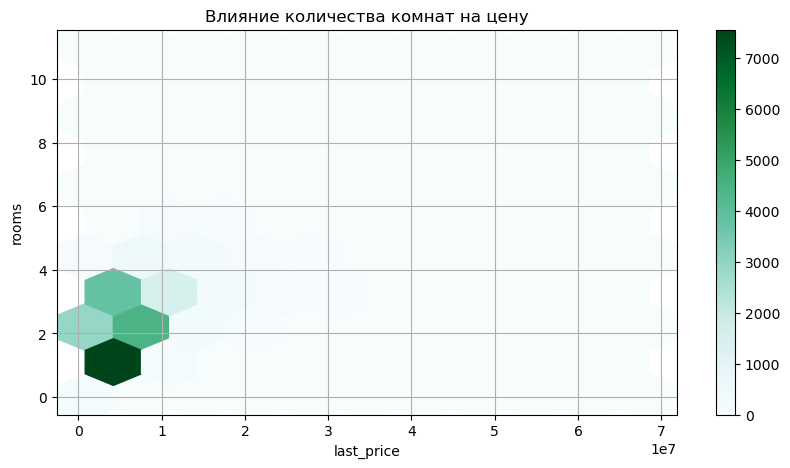

'Коэффициент корреляции между количеством комнат и ценой:'

0.4602442970207565

In [49]:
data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=10, figsize=(10, 5), sharex=False, 
          grid=True, title='Влияние количества комнат на цену')
plt.show()
display('Коэффициент корреляции между количеством комнат и ценой:', data['last_price'].corr(data['rooms']))

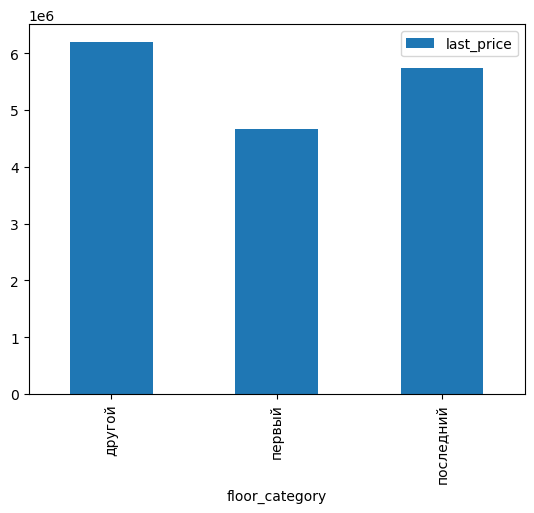

In [50]:
data.pivot_table(index='floor_category', values='last_price').plot.bar();


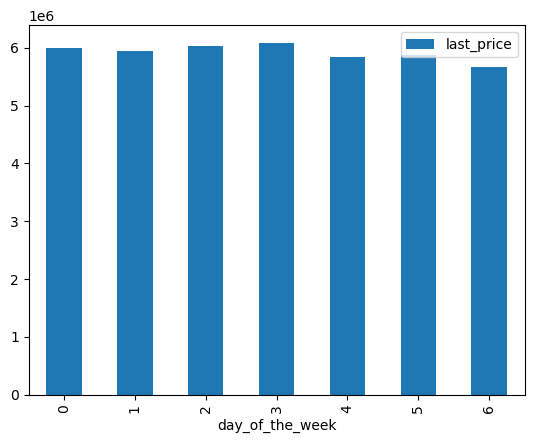

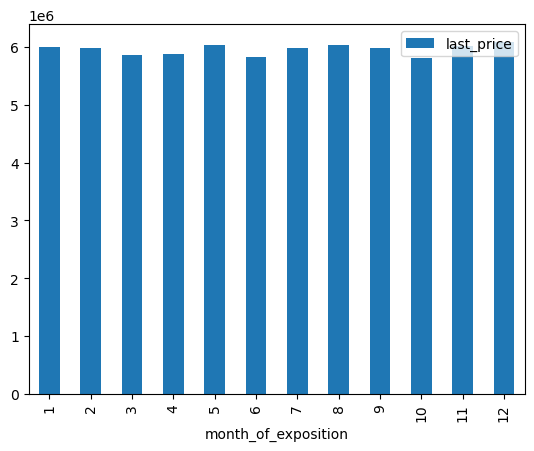

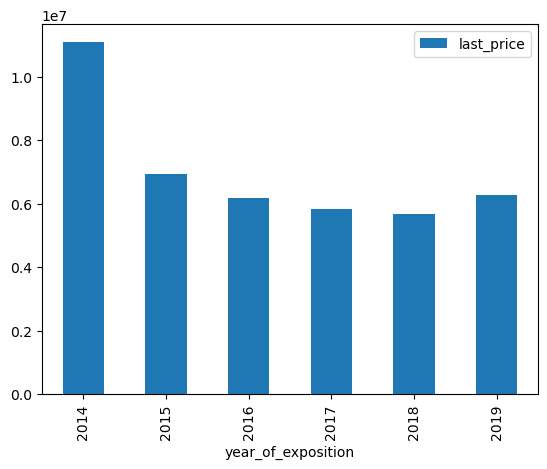

In [51]:
data.pivot_table(index='day_of_the_week', values='last_price').plot.bar()
plt.show()

data.pivot_table(index='month_of_exposition', values='last_price').plot.bar()
plt.show()

data.pivot_table(index='year_of_exposition', values='last_price').plot.bar()
plt.show()

'Изменение средней цены за кв.м. и средней площади за 2014-2019гг.'

,price_per_square,total_area
year_of_exposition,,
2014,120345.739130,83.299391
2015,99053.288104,66.250270
2016,96856.881648,60.417633
2017,95774.850871,58.437275
2018,97128.916838,56.733935
2019,105760.978433,57.608411


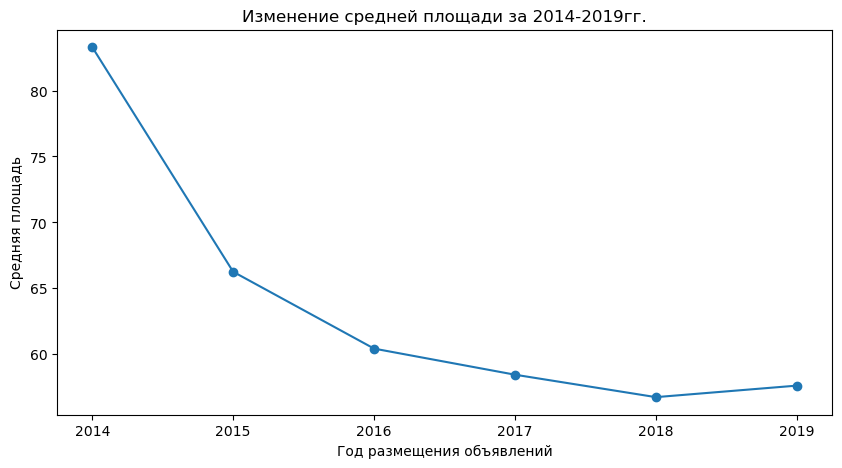

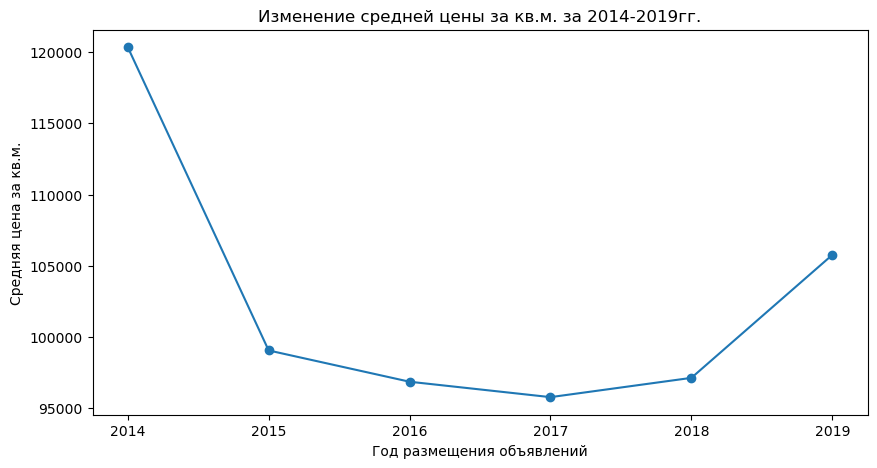

In [52]:
display('Изменение средней цены за кв.м. и средней площади за 2014-2019гг.', 
        data.pivot_table(index='year_of_exposition', values=['total_area', 'price_per_square']))

data.groupby('year_of_exposition')['total_area'].mean().plot(x='year_of_exposition',
y='total_area', style='o-', figsize=(10, 5), title='Изменение средней площади за 2014-2019гг.');
plt.xlabel('Год размещения объявлений');
plt.ylabel('Средняя площадь');
plt.show()

data.groupby('year_of_exposition')['price_per_square'].mean().plot(x='year_of_exposition',
y='price_per_square', style='o-', figsize=(10, 5), title='Изменение средней цены за кв.м. за 2014-2019гг.');
plt.xlabel('Год размещения объявлений');
plt.ylabel('Средняя цена за кв.м.');
plt.show()


'Изменение количества объявлений за 2014-2019гг.'

year_of_exposition
2014     115
2015    1076
2016    2670
2017    7926
2018    8249
2019    2782
Name: first_day_exposition, dtype: int64

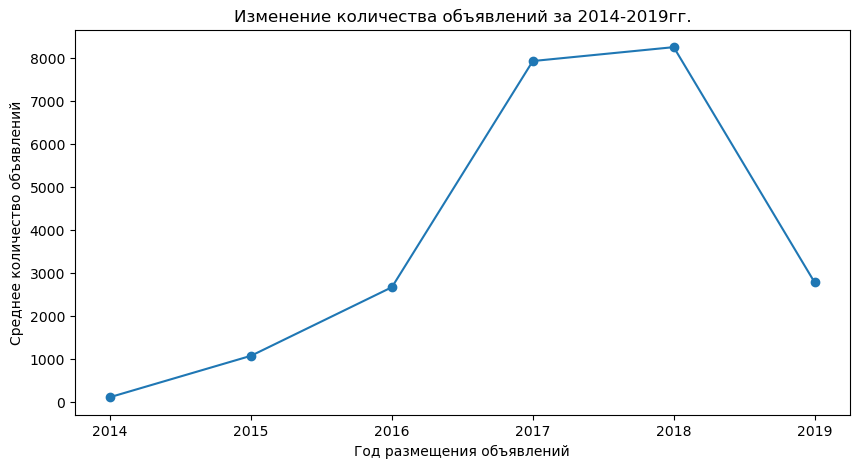

In [53]:
display('Изменение количества объявлений за 2014-2019гг.', 
        data.groupby('year_of_exposition')['first_day_exposition'].count())

data.groupby('year_of_exposition')['first_day_exposition'].count().plot(x='year_of_exposition',
y='first_day_exposition', style='o-', figsize=(10, 5), title='Изменение количества объявлений за 2014-2019гг.');
plt.xlabel('Год размещения объявлений');
plt.ylabel('Среднее количество объявлений');

'Взаимное влияние параметров:'

,Кол-во объявлений,Средняя цена за кв.м.,Средняя площадь
year_of_exposition,,,
2014,115,120345.739130,83.299391
2015,1076,99053.288104,66.250270
2016,2670,96856.881648,60.417633
2017,7926,95774.850871,58.437275
2018,8249,97128.916838,56.733935
2019,2782,105760.978433,57.608411


'Корреляция между параметрами количество объявлений, средняя цена за кв.м., средняя площадь:'

,Кол-во объявлений,Средняя цена за кв.м.,Средняя площадь
Кол-во объявлений,1.000000,-0.640277,-0.693307
Средняя цена за кв.м.,-0.640277,1.000000,0.859980
Средняя площадь,-0.693307,0.859980,1.000000


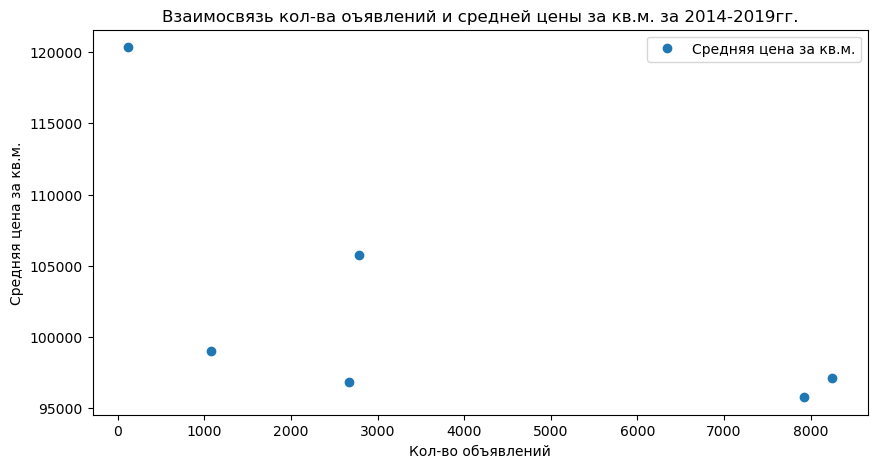

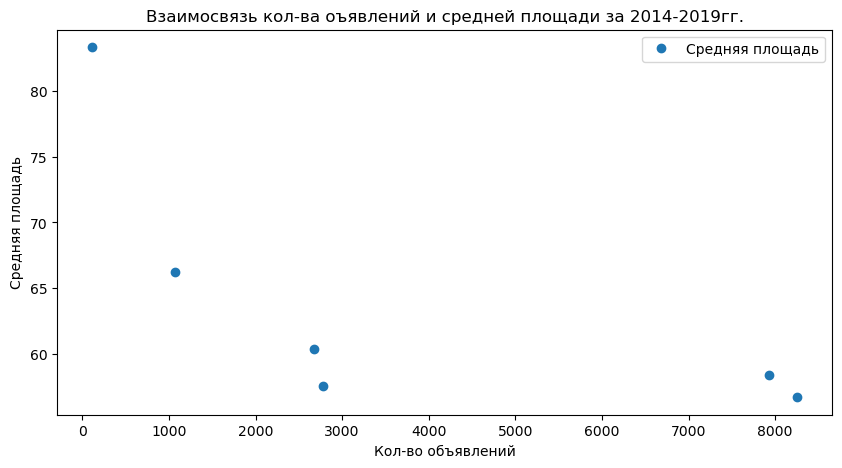

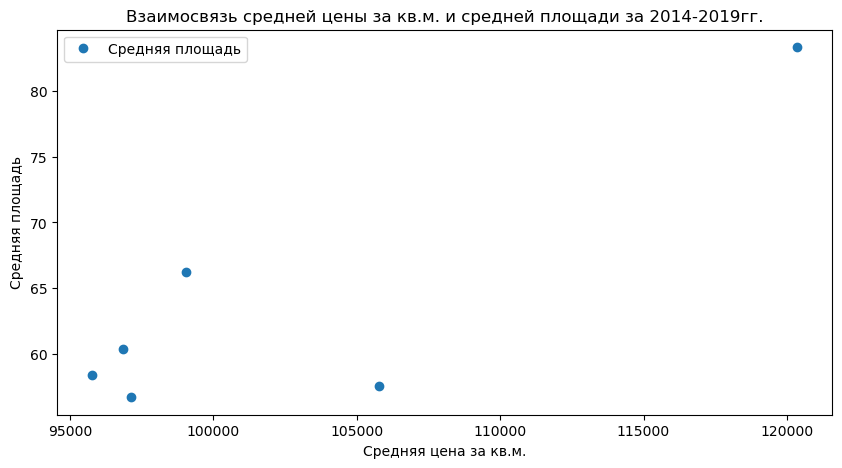

In [54]:
data_pivot_inner = data.pivot_table(index='year_of_exposition', values=['first_day_exposition', 'total_area', 
        'price_per_square'], aggfunc={'first_day_exposition':'count', 'total_area':'mean', 
        'price_per_square':'mean'})
data_pivot_inner.columns = ['Кол-во объявлений', 'Средняя цена за кв.м.', 'Средняя площадь']
display('Взаимное влияние параметров:', data_pivot_inner)
display('Корреляция между параметрами количество объявлений, средняя цена за кв.м., средняя площадь:', 
        data_pivot_inner.corr())

data_pivot_inner.plot(x='Кол-во объявлений', y='Средняя цена за кв.м.', style='o', figsize=(10, 5), 
                      title='Взаимосвязь кол-ва оъявлений и средней цены за кв.м. за 2014-2019гг.');
plt.xlabel('Кол-во объявлений');
plt.ylabel('Средняя цена за кв.м.');
plt.show()

data_pivot_inner.plot(x='Кол-во объявлений', y='Средняя площадь', style='o', figsize=(10, 5), 
                      title='Взаимосвязь кол-ва оъявлений и средней площади за 2014-2019гг.');
plt.xlabel('Кол-во объявлений');
plt.ylabel('Средняя площадь');
plt.show()

data_pivot_inner.plot(x='Средняя цена за кв.м.', y='Средняя площадь', style='o', figsize=(10, 5), 
                      title='Взаимосвязь средней цены за кв.м. и средней площади за 2014-2019гг.');
plt.xlabel('Средняя цена за кв.м.');
plt.ylabel('Средняя площадь');
plt.show()

##### Вывод:
По полученным данным можно определить степень влияния факторов на рыночную стоимость объектов. Расположим их от большего к меньшему:
1. Год размещения публикации. С 2014 по 2015 годы цены за кв.м. стремительно упали (на 17.7% за один год), после чего до 2018 года падение продолжалось медленными темпами. С 2017 по 2019 год цены постепенно начали восстанавливаться до уровня чуть выше 2015 года. Мы также видим, что в период с 2014-2019гг изменилась средння общая площадь опубликованных объектов - значение средней площади уменьшились с 2014 по 2018гг. более чем на 32%, небольшой отскос наблюдается лишь в 2019г. И так, в 2014г. мы видим самые высокие показатели цен за кв.м., средней общей площади объектов, но при этом количество размещенных объектов в 2014 году было самое меньшее из периода, порядка 1.4% от количества объявлений в 2018г.(в 2018г. размещено больше всего объявлений). 
2. Площадь объекта. На цену объекта влияют такие показатели как общая площадь (больше) и жилая площадь (меньше).  Коэффициенты корреляции достаточно высокие: 0.75 и 0.65 соответственно, что означает что чем больше указанные площади, тем выше цена объекта. Данный фактор еще подвтерждается высокой положительной корреляцией между показателями средняя цена за кв.м. и средняя площадь (0.85).
3. Количество размещенных объявлений. Данный фактор также влияет на рыночную стоимость объектов, однако влияние - отрицательное. В данном промежутке времени в среднем чем больше объявлений тем ниже цены и площади объектов.  Корреляция составтялет -0.64.
4. Площадь объекта. Площадь кухни также положительно влияет на цену недвижимости, однако его влияние ниже чем у показателей общая и жилая площади. Коэффициент корреляции составляет 0.56
5. Этаж расположения объекта, как и ожидалось, влияет на цену объекта. Первые и последние этажи были проданы дешевле, чем объекты на других этажах. При этом следует отметить, что квартиры на последних этаж стоят дороже квартир на первых этажах.
6. Количество комнат также влияет на цену объекта, но влияние несильно выраженное. Коэффициент корреляции составляет 0.46.

День недели и месяц публикаций не имеют взаимосвязи с ценами продаж.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

'Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений'

,Средняя цена кв.м.,Кол-во объектов
locality_name,,
Санкт-Петербург,112231.0,15142
Мурино,85777.0,571
Кудрово,95332.0,461
поселок Шушары,78200.0,429
Всеволожск,68668.0,395
Пушкин,102927.0,355
Колпино,75333.0,337
поселок Парголово,89776.0,316
Гатчина,68846.0,302


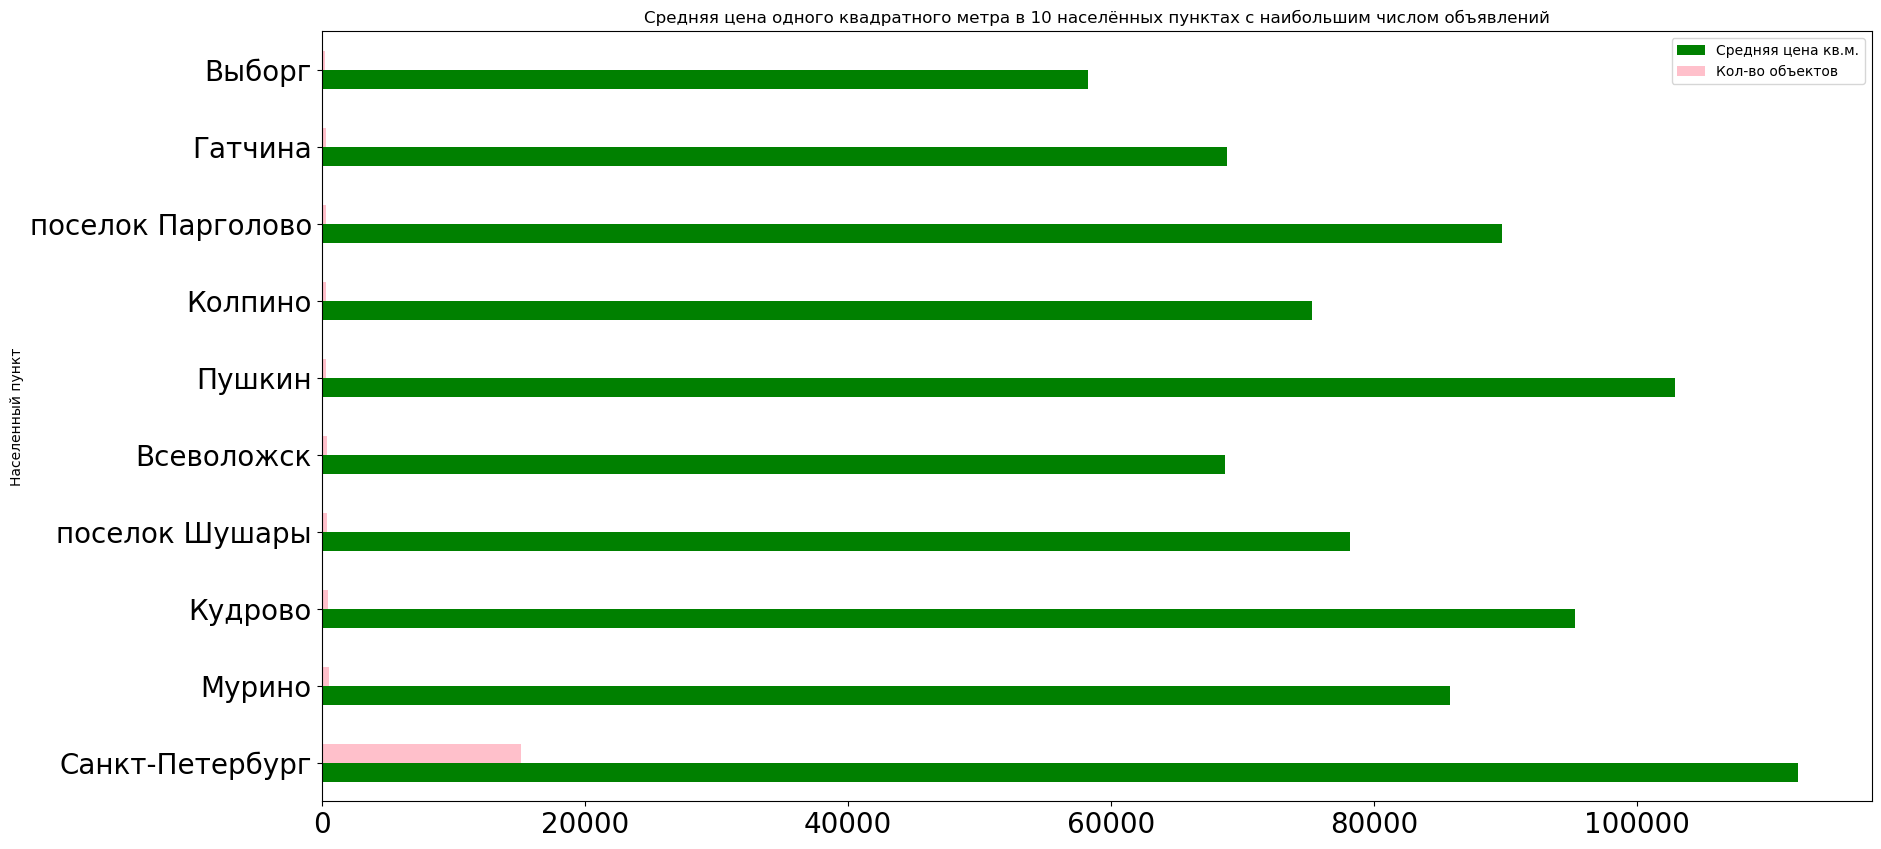

'10 населённых пунктов с самой высокой стоимостью квадратного метра'

,Средняя цена кв.м.,Кол-во объектов
locality_name,,
Зеленогорск,118797.0,21
поселок Лисий Нос,113728.0,2
Санкт-Петербург,112231.0,15142
поселок Репино,104238.0,4
Пушкин,102927.0,355
Сестрорецк,102097.0,177
деревня Мистолово,98550.0,11
поселок Левашово,96998.0,1
Кудрово,95332.0,461


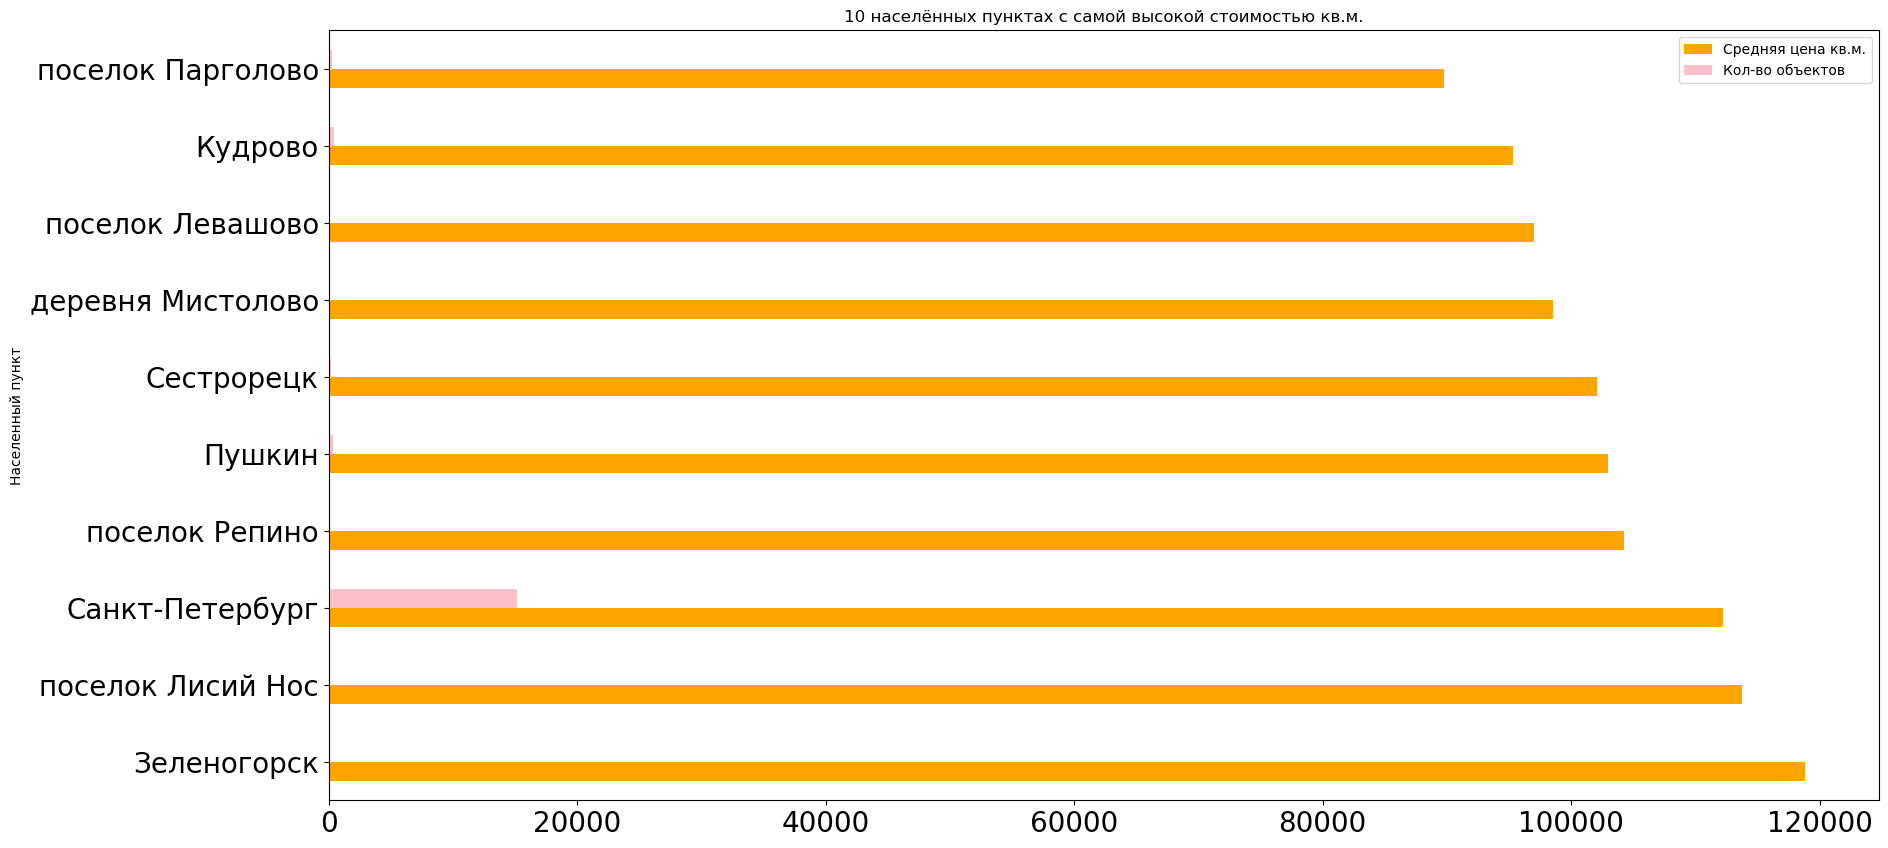

'10 населённых пунктов с самой низкой стоимостью квадратного метра'

,Средняя цена кв.м.,Кол-во объектов
locality_name,,
деревня Торошковичи,17530.0,2
поселок Шугозеро,16608.0,1
деревня Большой Сабск,16453.0,1
поселок Почап,16038.0,1
поселок Оредеж,15564.0,2
поселок станции Лужайка,15000.0,1
поселок Житково,14956.0,2
деревня Сижно,13710.0,1
деревня Малая Романовка,12725.0,1


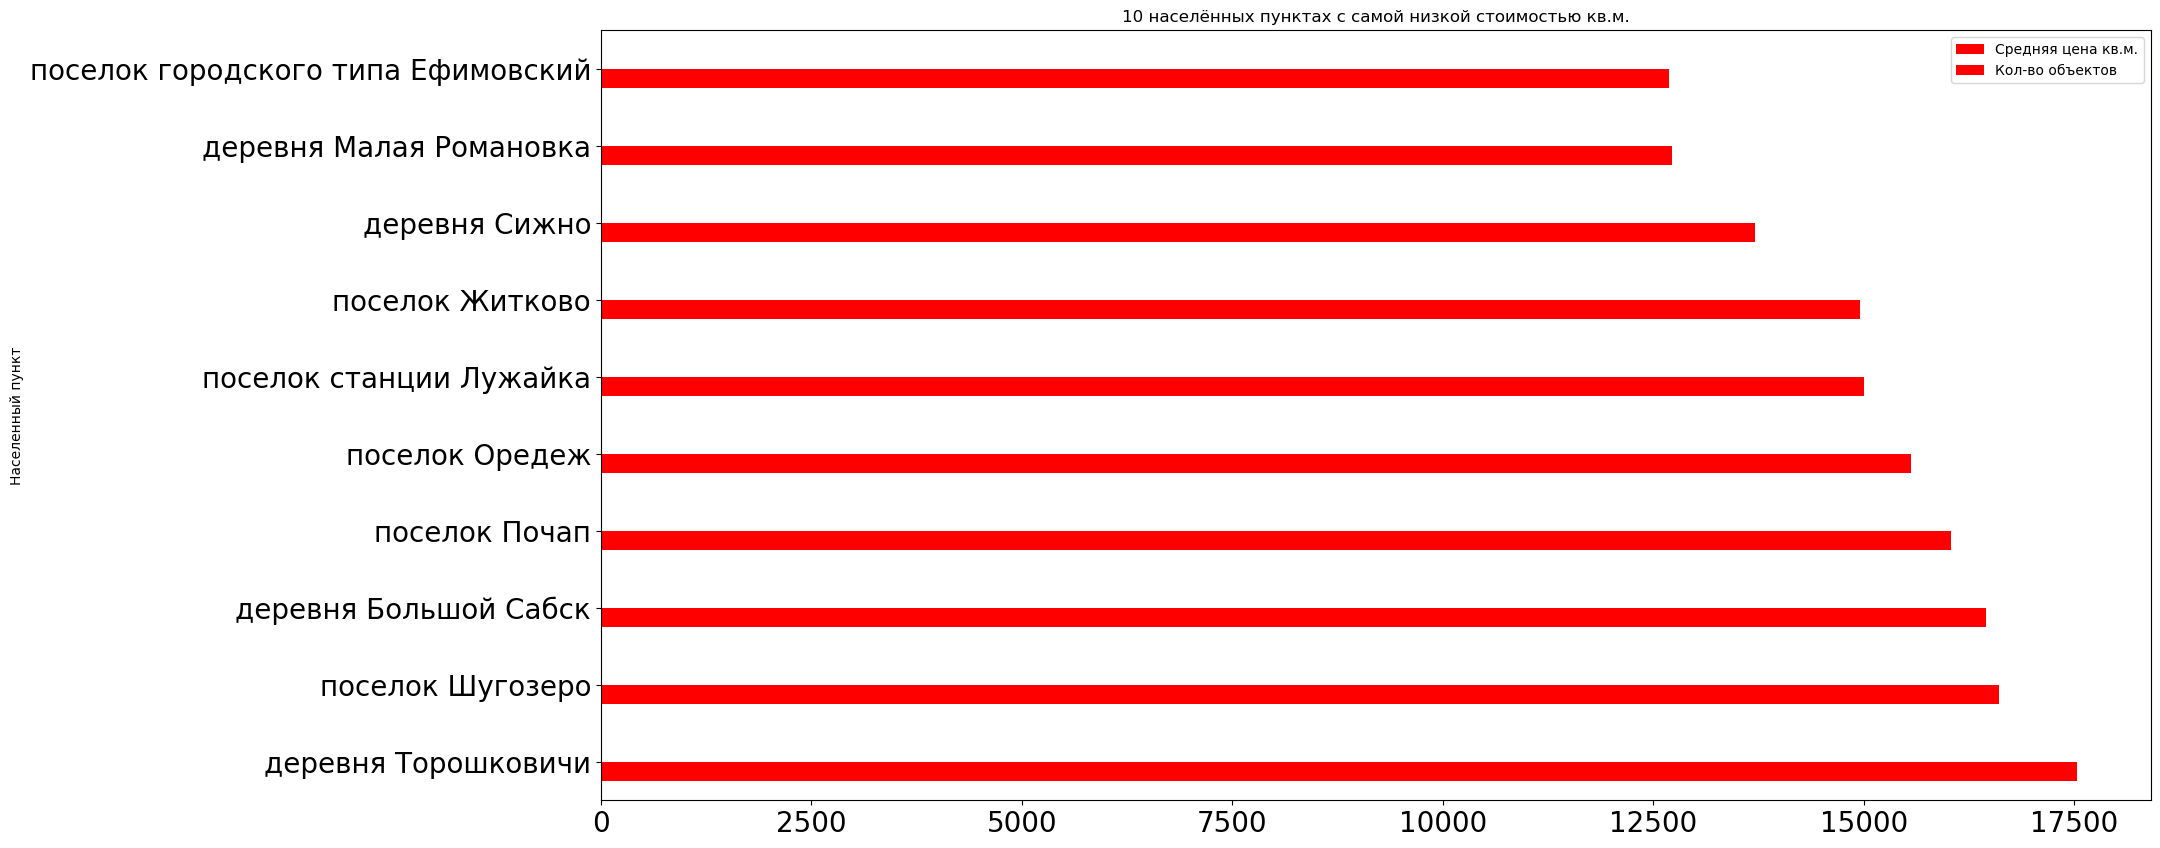

'Населенный пункт с самой высокой стоимостью квадратного метра'

'Зеленогорск'

'Населенный пункт с самой низкой стоимостью квадратного метра'

'поселок городского типа Ефимовский'

In [55]:
locality = data.pivot_table(index='locality_name', values='price_per_square', 
                            aggfunc=['mean', 'count'])

locality.columns = ['Средняя цена кв.м.', 'Кол-во объектов']
locality['Средняя цена кв.м.'] = np.round(locality['Средняя цена кв.м.'], 0)
locality = locality.sort_values(by='Кол-во объектов', ascending=False)
locality_sorted_by_squareprice = locality.sort_values(by='Средняя цена кв.м.', ascending=False)
display('Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений', 
        locality.head(10))
locality.head(10).plot(kind = 'barh', figsize = (20, 10), 
        title='Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений', 
        fontsize= 20, color={'pink', 'green'})
plt.ylabel('Населенный пункт');
plt.show()

display('10 населённых пунктов с самой высокой стоимостью квадратного метра', 
        locality_sorted_by_squareprice.head(10))
locality_sorted_by_squareprice.head(10).plot(kind = 'barh', figsize = (20, 10), 
        title='10 населённых пунктах с самой высокой стоимостью кв.м.', 
        fontsize= 20, color={'pink', 'orange'})
plt.ylabel('Населенный пункт');
plt.show()

display('10 населённых пунктов с самой низкой стоимостью квадратного метра', 
        locality_sorted_by_squareprice.tail(10))
locality_sorted_by_squareprice.tail(10).plot(kind = 'barh', figsize = (20, 10), 
        title='10 населённых пунктах с самой низкой стоимостью кв.м.', 
        fontsize= 20, color='red')
plt.ylabel('Населенный пункт');
plt.show()

display('Населенный пункт с самой высокой стоимостью квадратного метра', 
        locality['Средняя цена кв.м.'].idxmax())
display('Населенный пункт с самой низкой стоимостью квадратного метра', 
        locality['Средняя цена кв.м.'].idxmin())

##### Вывод:

На линейчатых графиках наглядно продемонтрирована средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Для сравнения приведены графики 10 населённых пунктов с самой высокой и самой низкой стоимостью кв.м.

Населенным пунктом с самой высокой стоимостью квадратного метра является Зеленогорск. Объекты в данном населенном пункте в среднем на 5.85% дороже чем в Сакнт-Петербурге. Стоит отметить, что Зеленогорск не входит в список 10 населённых пунктов с наибольшим числом объявлений.

Населенным пунктом с самой низкой стоимостью квадратного метра является поселок городского типа Ефимовский. Объекты в данном населенном пункте более чем в 8.8 раз дешевле чем в Сакнт-Петербурге.

Таким образом, разница цен за кв.м. между Населенным пунктом с самой высокой стоимостью кв.м. и Населенным пунктом с самой низкой стоимостью кв.м. составляет 106110руб. (9.36 раз).

#### Рассмотрим, как стоимость объектов зависит от расстояния до центра города:

,locality_name,cityCenters_nearest,price_per_square
0,Санкт-Петербург,16.0,120370.0
2,Санкт-Петербург,14.0,92786.0
3,Санкт-Петербург,7.0,408176.0
7,Санкт-Петербург,12.0,110545.0
9,Санкт-Петербург,15.0,88525.0


cityCenters_nearest
0.0    198956.666667
1.0    145822.219512
2.0    141831.838235
3.0    118828.546547
4.0    127402.109231
Name: price_per_square, dtype: float64

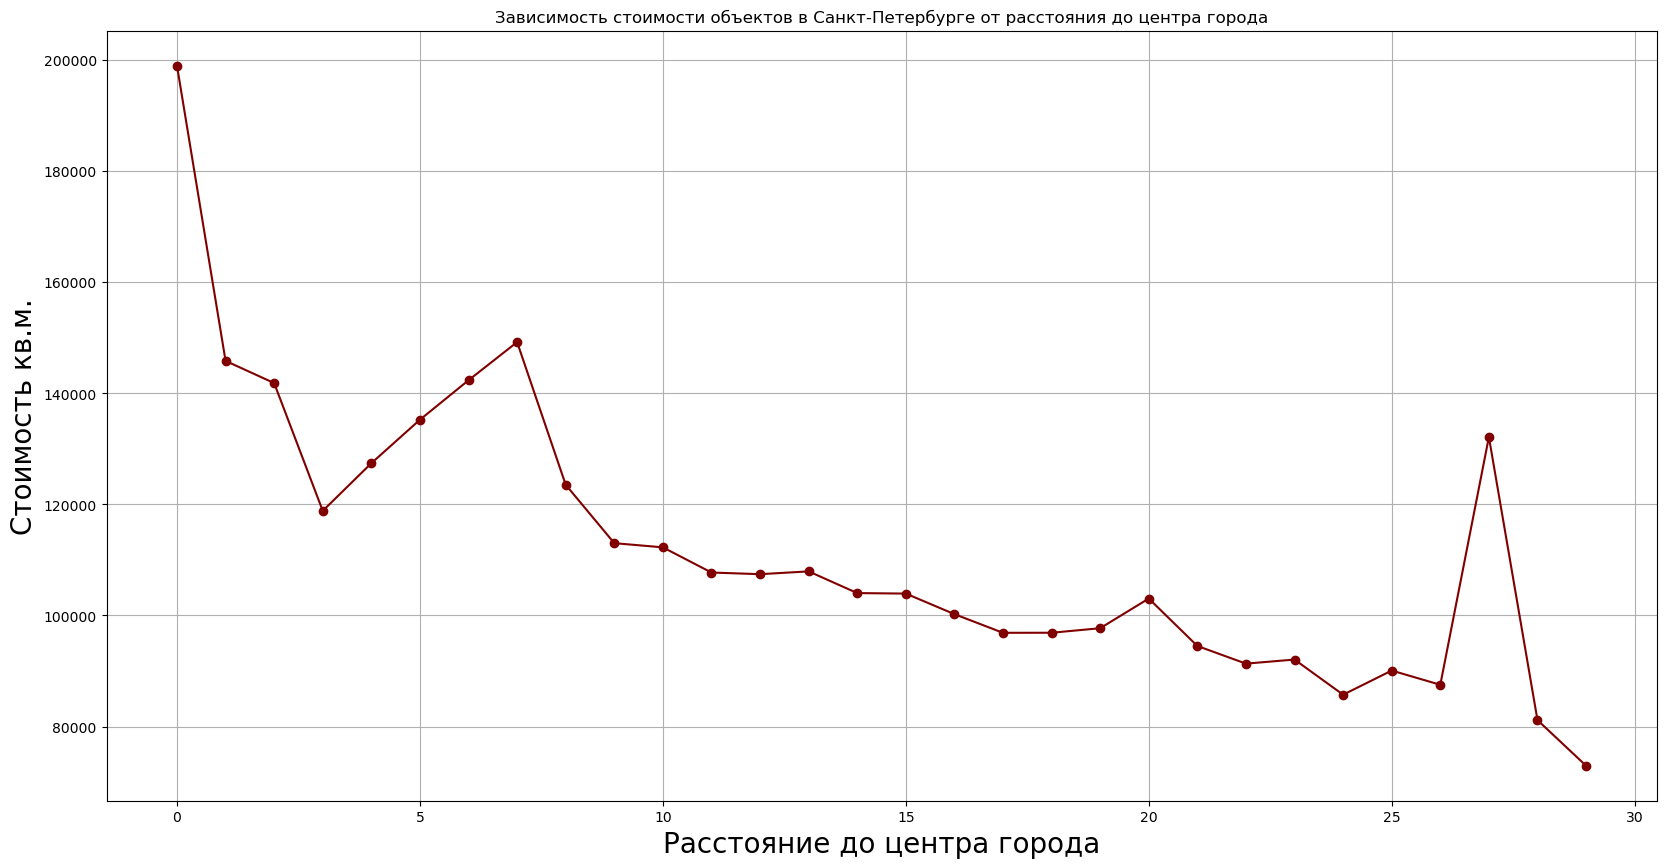

In [56]:
petersburg = data[['locality_name', 'cityCenters_nearest', 'price_per_square']]
petersburg = petersburg.query('locality_name == "Санкт-Петербург"')
petersburg = petersburg[~petersburg['cityCenters_nearest'].isna()]
display(petersburg.head())

petersburg_grouped = petersburg.groupby('cityCenters_nearest')['price_per_square'].mean()
display(petersburg_grouped.head())

petersburg_grouped.plot(x='cityCenters_nearest', y='price_per_square', style='o-', figsize=(20, 10),
grid=True, color='maroon', title='Зависимость стоимости объектов в Санкт-Петербурге от расстояния до центра города')
plt.xlabel('Расстояние до центра города', fontsize=20)
plt.ylabel('Стоимость кв.м.', fontsize= 20)  
plt.show()


In [57]:
petersburg27 = data.loc[(data['locality_name'] == 'Санкт-Петербург') & 
                        (data['cityCenters_nearest'] == 27)]
display('Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 27км.')
petersburg27 = petersburg27[['total_area', 'living_area', 'price_per_square', 
                    'year_of_exposition', 'floor_category', 'kitchen_area']]
display(petersburg27)

'Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 27км.'

,total_area,living_area,price_per_square,year_of_exposition,floor_category,kitchen_area
748,74.0,30.0,193919.0,2017,другой,25.0
5961,32.0,16.5,70312.0,2018,последний,7.0


'Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 5км.'

,total_area,living_area,price_per_square,year_of_exposition,floor_category,kitchen_area
99,90.0,67.0,106667.0,2017,другой,8.0
138,40.0,29.0,120000.0,2017,другой,6.0
154,80.0,44.2,102500.0,2018,другой,12.2
179,108.7,72.4,136155.0,2019,последний,8.0
181,71.8,38.7,110028.0,2017,первый,12.0
...,...,...,...,...,...,...
23178,60.0,42.0,99167.0,2018,первый,8.0
23387,50.0,27.0,112000.0,2017,первый,10.0
23430,38.0,16.0,138421.0,2018,первый,12.0
23449,52.6,29.8,119772.0,2015,другой,8.7


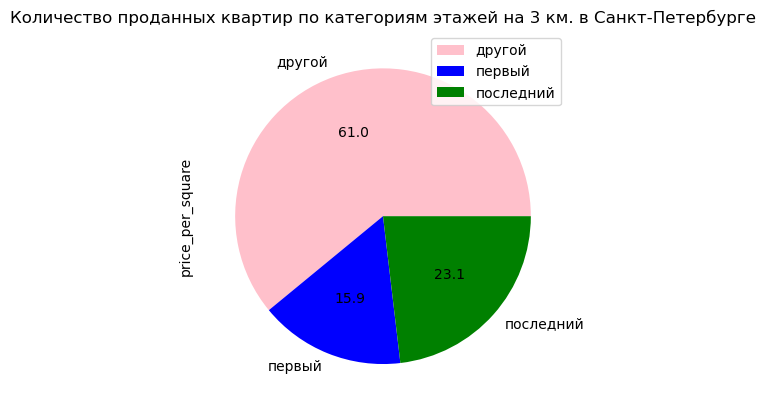

In [58]:
petersburg3 = data.loc[(data['locality_name'] == 'Санкт-Петербург') & 
                        (data['cityCenters_nearest'] == 3)]
display('Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 5км.')
petersburg3 = petersburg3[['total_area', 'living_area', 'price_per_square', 
                    'year_of_exposition', 'floor_category', 'kitchen_area']]
display(petersburg3)

petersburg3.pivot_table(index='floor_category', values='price_per_square', aggfunc='count').plot(kind='pie', 
                        y='price_per_square', colors=['pink', 'blue', 'green'], autopct='%.1f',
                        title='Количество проданных квартир по категориям этажей на 3 км. в Санкт-Петербурге')
plt.show()

'Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 5км.'

,total_area,living_area,price_per_square,year_of_exposition,floor_category,kitchen_area
63,118.0,68.0,169492.0,2018,другой,16.0
141,32.6,18.5,199387.0,2019,последний,5.5
159,66.0,37.8,106818.0,2017,последний,11.0
219,58.7,17.0,131175.0,2017,другой,15.7
262,158.0,88.0,237342.0,2019,другой,40.0
...,...,...,...,...,...,...
23549,184.0,55.7,106522.0,2016,последний,24.5
23559,108.6,70.6,127072.0,2016,другой,10.3
23588,69.0,NaN,117391.0,2015,другой,10.0
23664,110.0,64.6,81818.0,2015,другой,15.8


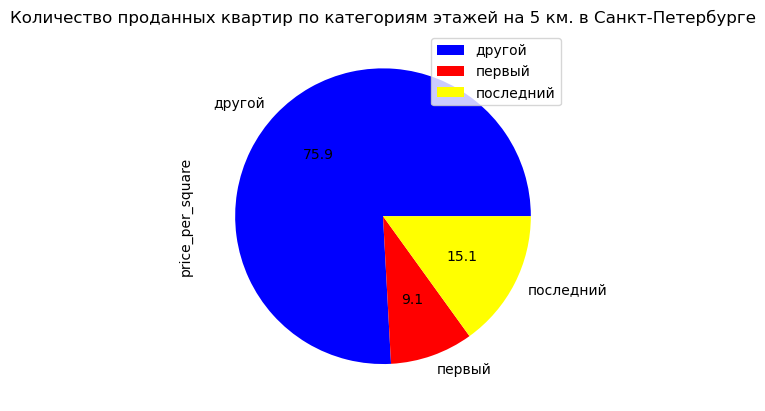

In [59]:
petersburg5 = data.loc[(data['locality_name'] == 'Санкт-Петербург') & 
                        (data['cityCenters_nearest'] == 5)]
display('Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 5км.')
petersburg5 = petersburg5[['total_area', 'living_area', 'price_per_square', 
                    'year_of_exposition', 'floor_category', 'kitchen_area']]
display(petersburg5)

petersburg5.pivot_table(index='floor_category', values='price_per_square', aggfunc='count').plot(kind='pie', 
                        y='price_per_square', colors=['blue', 'red', 'yellow'], autopct='%.1f',
                        title='Количество проданных квартир по категориям этажей на 5 км. в Санкт-Петербурге')
plt.show()

'Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 7км.'

,total_area,living_area,price_per_square,year_of_exposition,floor_category,kitchen_area
3,159.0,NaN,408176.0,2015,другой,NaN
52,136.0,94.0,86728.0,2017,последний,11.0
94,29.5,15.6,118644.0,2019,другой,5.5
145,77.0,40.0,107662.0,2015,другой,10.0
206,31.3,16.0,162300.0,2019,другой,7.6
...,...,...,...,...,...,...
23238,36.3,NaN,159504.0,2019,другой,8.2
23299,167.1,102.3,154997.0,2017,другой,22.3
23422,145.0,66.4,137931.0,2016,другой,14.5
23632,38.0,NaN,131579.0,2018,другой,NaN


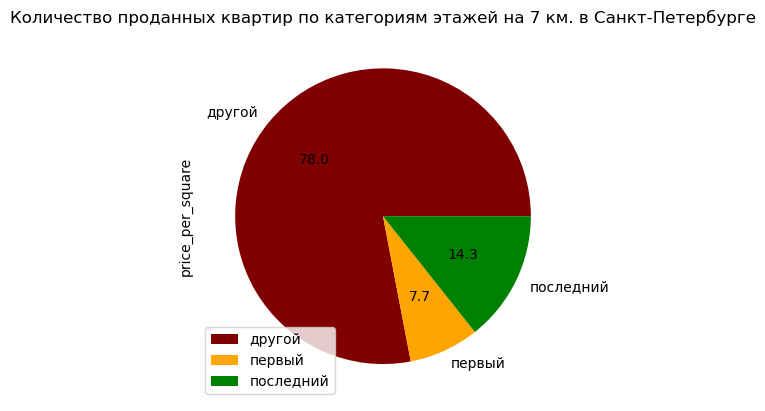

In [60]:
petersburg7 = data.loc[(data['locality_name'] == 'Санкт-Петербург') & 
                        (data['cityCenters_nearest'] == 7)]
display('Рассмотрим подробнее срез таблицы по Санкт-Петербургу, расстояние до центра города - 7км.')
petersburg7 = petersburg7[['total_area', 'living_area', 'price_per_square', 
                    'year_of_exposition', 'floor_category', 'kitchen_area']]
display(petersburg7)

petersburg7.pivot_table(index='floor_category', values='price_per_square', aggfunc='count').plot(kind='pie', 
                        y='price_per_square', colors=['maroon', 'orange', 'green'], autopct='%.1f',
                        title='Количество проданных квартир по категориям этажей на 7 км. в Санкт-Петербурге')
plt.show()

##### Вывод:
На графике "Зависимость стоимости объектов в Санкт-Петербурге от расстояния до центра города" видна линейная зависимость стоимость недвижимости от расстояния до центра города: чем ближе к центру города, тем выше стоимость объекта. Также график иллюстрирует стоимость недвижимости на каждом км. Но при этом на графике видны 3 нетипичные точки: на 27км, 3-7км.
1. При приближенном рассмотрении данных на 27км. выявлена причина выброса: на 27 км. были совершены 2 сделки со стомостью 70312 руб./кв.м. (что соответствует уровню цен в данном диапазоне расстояния до центра города) и 193919 руб./кв.м.(что является аномальным значением для данного дипазона расстояния до центра города). Средняя стоимость этих двух значений привела к пику на графике.
2. Для рассмотрения нетипичного падения и пика в диапазоне с 3 по 7км, были построены круговые диаграммы для 3км, 5км и 7км, демонстрирующие долю проданных объектов по категориям этажей. Согласно диаграммам, доля объектов по категории этажа 'другие' (не первый и не последний) на 3 км. составила 61%, на 5км - 75.9%, а на 7км - 78%. Это объясняет рост стоимости недвижимости в диапазоне с 3 по 7км, так как недвижимость на этажах 'другие' оценивается выше на рынке (см. вывод 4.3.1).

### Общий вывод

Исходя из поставленной задачи, на основе проведенного анализа, можно определить следующие основные параметры, которые влияют на рыночную стоимость недвижимости:

1. Год продажи недвижимости: возможно это связано с глобальными и/или локальными экономическими и политическими изменениями. Как показывает данный анализ, стоимость недвижимости имеет сильную взаисвязь с календарным годом.

2. Месторасположение: населенный пункт в котором находится объект влияет на рыночную стоимость недвижимости. Разница цен за кв.м. между Населенным пунктом с самой высокой стоимостью кв.м. и Населенным пунктом с самой низкой стоимостью кв.м. составляет 106110руб. (9.36 раз).Вероятно, имеют влияние такие факторы как инфраструктура, экология и прочие факторы. Для опеределния этих факторов необходимо проведение дополнительного анализа.

3. Для города Санкт-Петербурга - расстояние до центра города. Видна линейная зависимость стоимость недвижимости от расстояния до центра города: чем ближе к центру города, тем выше стоимость объекта.

4. Площадь объекта. На цену объекта влияют такие показатели как общая площадь (больше) и жилая площадь (меньше).  Коэффициенты корреляции достаточно высокие: 0.75 и 0.65 соответственно, что означает что чем больше указанные площади, тем выше цена объекта. Данный фактор еще подвтерждается высокой положительной корреляцией между показателями средняя цена за кв.м. и средняя площадь (0.85).

5. Площадь объекта. Площадь кухни также положительно влияет на цену недвижимости, однако его влияние ниже чем у показателей общая и жилая площади. Коэффициент корреляции составляет 0.56

6. Категория этажа, на котором расположен объект. Объекты на первых и последних этажах оцениваются ниже, чем объекты на других этажах. 

7. Количество размещенных объявлений. Данный фактор также влияет на рыночную стоимость объектов, однако влияние - отрицательное. В данном промежутке времени в среднем чем больше объявлений тем ниже цены и площади объектов.  Корреляция составтялет -0.64.

8. Количество комнат также влияет на цену объекта, но влияние несильно выраженное. Коэффициент корреляции составляет 0.46.

Дополнительная общая информация:
1. Самыми часто продаваемыми квартирами являются 1-2х комнатные квартиры общей площадью 45кв.м., 30 и 42 кв.м. стоимостью от 3.5 до 5 млн. Высота потолка - 2.5м. Этажи расположения объекта - с 1 по 5 включительно в 5-ти и 9-ти этажных домах. Большая часть этой недвижимости расположена от центра в промежутке от 11 до 17 км, от аэропорта от 13 до 19 км. Расстояния до ближайших парков 300-600м.
2. Большая часть объявлений публикуется в будние дни. Самая большая активность в публикации объявлений наблюдается начиная с февраля по март (по убывающей). Далее с сентября по ноябрь (по возрастанию) возобновляется активность в публикациях. 
3. Большее количество объектов было продано за 45 дней с даты размещения объявления.
4. Самая большая активность в публикации объявлений наблюдается начиная с февраля по март (по убывающей). Далее с сентября по ноябрь (по возрастанию) возобновляется актиность в публикациях. В летние месяцы, декабре и январе количество публикаций уменьшается. Меньше всего публикаций в мае месяце.
5. Полезно подчеркнуть, что начиния с 2014 по 2019 скорость совершения сделок ежегодно росла на 25% и более и в 2019 году скорость продаж увеличилась более чем в 8 раз по сравнению с 2014 годом. 
